# Imports

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
import sys


import xobjects as xo
import xtrack as xt
import xpart as xp

sys.path.append('../')
import BBStudies.Base.XsuitePlus as xPlus
import BBStudies.Base.InteractionPoint as inp

LINEFOLDER   = '../Data/Lines/'
SURVEYFOLDER = '../Data/Surveys/'
df_columns = ['name', 's', 'x', 'px', 'y', 'py', 'zeta', 'delta', 'ptau', 'betx', 'bety', 'alfx', 'alfy', 'gamx', 'gamy', 'dx', 'dpx', 'dy', 'dpy', 'mux', 'muy', 'qx', 'qy', 'qs', 'dqx', 'dqy']


line   = {}
twiss  = {}
survey = {}

# Importing survey
for seq in ['lhcb1','lhcb2']:
    _beam = seq[-2:]
    survey[_beam] = pd.read_pickle(SURVEYFOLDER + f'survey_opticsfile32_{seq}.pkl')

# Importing twiss
for seq in ['lhcb1','lhcb4']:
    _beam = seq[-2:]
    
    # Importing Line
    line[_beam] = xPlus.importLine(LINEFOLDER + f'line_opticsfile32_{seq}.json')
    
    # Importing twiss and tracker
    if _beam == 'b1':
        tracker = xt.Tracker(line=line[_beam])
        xtwiss  = tracker.twiss()
    else:
        xtwiss  = xt.Tracker(line=line[_beam]).twiss()
    
    twiss[_beam]= pd.DataFrame(xtwiss,columns = df_columns)
    twiss[_beam].set_index('name',inplace=True)


# Creating twiss b2 from b4
#==========================================
twiss['b2'] = twiss['b4'].copy()

# Flipping x
twiss['b2']['x'] = -twiss['b2']['x']
twiss['b2']['px'] = -twiss['b2']['px']
twiss['b2']['dpx'] = -twiss['b2']['dpx']

# Flipping s
lhcb2_L     = twiss['b2'].loc['_end_point','s']
twiss['b2']['s'] = (-twiss['b2']['s']+lhcb2_L).mod(lhcb2_L)
twiss['b2'].loc[['lhcb2ip3_p_','_end_point'],'s'] = lhcb2_L
twiss['b2'].sort_values(by='s',inplace=True)
#==========================================

# Clearing xsuite ouput
clear_output(wait=False)






# Creating IP objects!

In [16]:
B1 = inp.Beam('b1',twiss['b1'],survey['b1'],
              Nb       = 1.15e11,
              E        = 6.8e12,
              emittx_n = 2.5e-6,
              emitty_n = 2.5e-6,
              dp_p0    = 0)
    
B2 = inp.Beam('b2',twiss['b2'],survey['b2'],
              Nb       = 1.15e11,
              E        = 6.8e12,
              emittx_n = 2.5e-6,
              emitty_n = 2.5e-6,
              dp_p0    = 0)

IP1 = inp.InteractionPoint('ip1',B1,B2)
IP5 = inp.InteractionPoint('ip5',B1,B2)

AssertionError: 

--- 

In [11]:
twiss['b1']

,s,x,px,y,py,zeta,delta,ptau,betx,bety,...,dpx,dy,dpy,mux,muy,qx,qy,qs,dqx,dqy
name,,,,,,,,,,,,,,,,,,,,,
ip3,0.0000,-7.389495e-08,-2.101568e-08,6.588749e-07,9.071825e-09,0.000002,0.000001,0.000001,116.230362,211.252465,...,-0.014200,0.461392,0.006256,0.000000,0.000000,62.301108,60.312042,0.001867,14.190218,15.754116
drift_0,0.0000,-7.389495e-08,-2.101568e-08,6.588749e-07,9.071825e-09,0.000002,0.000001,0.000001,116.230362,211.252465,...,-0.014200,0.461392,0.006256,0.000000,0.000000,62.301108,60.312042,0.001867,14.190218,15.754116
mcbwv.4r3.b1,21.0300,-5.158540e-07,-2.101568e-08,8.496551e-07,9.071825e-09,0.000002,0.000001,0.000001,44.686189,332.022895,...,-0.014200,0.592964,0.006256,0.046545,0.012499,62.301108,60.312042,0.001867,14.190218,15.754116
drift_1,21.0300,-5.158540e-07,-2.101568e-08,8.496551e-07,9.071825e-09,0.000002,0.000001,0.000001,44.686189,332.022895,...,-0.014200,0.592964,0.006256,0.046545,0.012499,62.301108,60.312042,0.001867,14.190218,15.754116
bpmw.4r3.b1,22.5205,-5.471778e-07,-2.101568e-08,8.631766e-07,9.071825e-09,0.000002,0.000001,0.000001,41.353515,341.738141,...,-0.014200,0.602289,0.006256,0.051998,0.013195,62.301108,60.312042,0.001867,14.190218,15.754116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
drift_30803,26636.4387,3.977907e-07,-2.101568e-08,4.552625e-07,9.071823e-09,0.000002,0.000001,0.000001,243.110298,115.959833,...,-0.014187,0.320617,0.006255,62.280051,60.289415,62.301108,60.312042,0.001867,14.190218,15.754116
mcbwh.4l3.b1,26640.1832,3.190976e-07,-2.101568e-08,4.892319e-07,9.071823e-09,0.000002,0.000001,0.000001,218.317476,129.448613,...,-0.014187,0.344038,0.006255,62.282607,60.294222,62.301108,60.312042,0.001867,14.190218,15.754116
drift_30804,26640.1832,3.190976e-07,-2.101568e-08,4.892319e-07,9.071823e-09,0.000002,0.000001,0.000001,218.317476,129.448613,...,-0.014187,0.344038,0.006255,62.282607,60.294222,62.301108,60.312042,0.001867,14.190218,15.754116


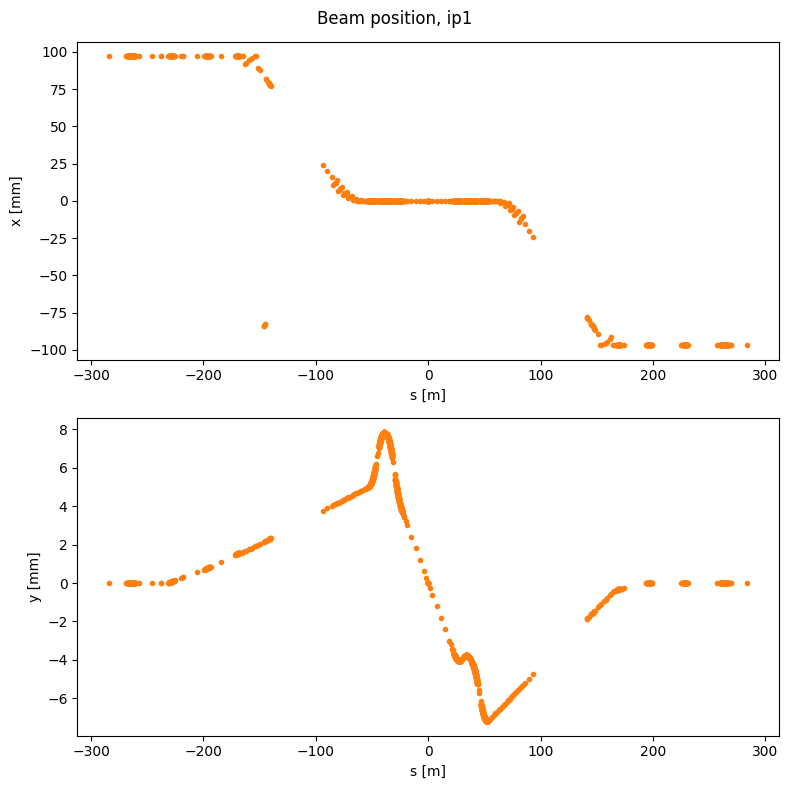

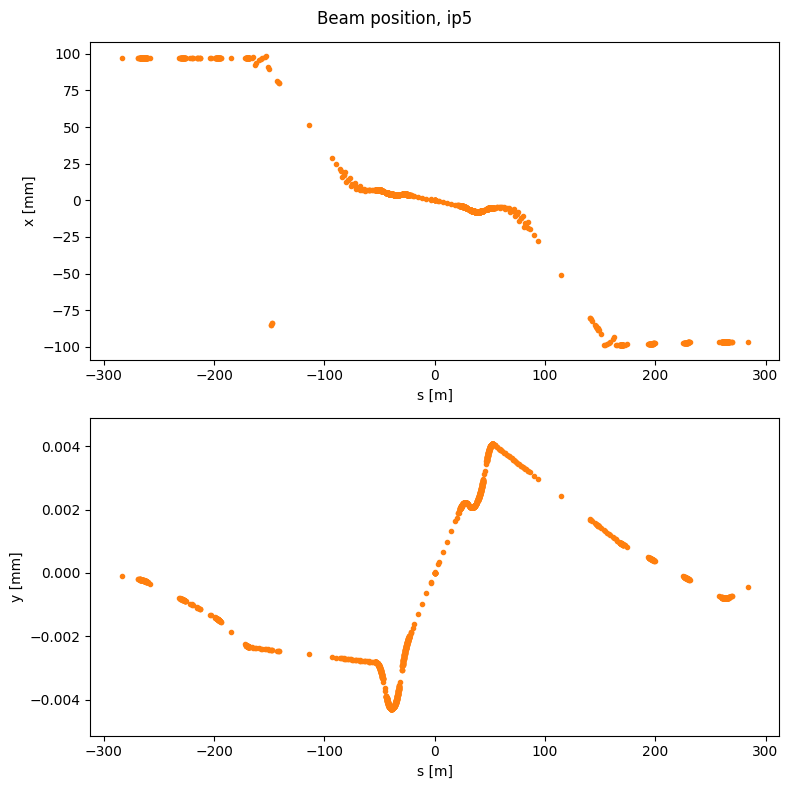

In [ ]:
chosenIPs = ['ip1','ip5']
for _IP in chosenIPs:

    # ROI around IP
    ROI_twiss_b1,ROI_survey_b1 = inp.extract_IP_ROI(_IP,'b1',twiss['b1'],survey['b1'])
    ROI_twiss_b2,ROI_survey_b2 = inp.extract_IP_ROI(_IP,'b2',twiss['b2'],survey['b2'])

  
    # Plotting
    
    fig, axes = plt.subplots(2, 1,figsize=(8,8))
    fig.suptitle(f'Beam position, {_IP}')
    for plane,ax in zip(['x','y'],axes.flatten()):
        
        center = ROI_twiss_b1.loc[_IP,f'{plane}_lab']
        ax.plot(ROI_twiss_b1['s_lab'],(ROI_twiss_b1[f'{plane}_lab']-center)/1e-3,'.')
        ax.plot(ROI_twiss_b2['s_lab'],(ROI_twiss_b2[f'{plane}_lab']-center)/1e-3,'.')
        
            
    
        ax.set(xlabel='s [m]', ylabel=f'{plane} [mm]')
    plt.tight_layout()

In [ ]:



for _IP in [IP1,IP5]:
    
    # Plotting   
    #fig, axes = plt.subplots(1, 2,figsize=(10,5))
    fig = plt.figure(figsize=(10,5))
    fig.suptitle(f'beta functions, {_IP.name}')
    
    #plt.sca(axes[0])
    plt.plot(_IP.b1.twiss['s_lab'],_IP.b1.twiss['betx'],color='C0',label=r'B1: $\beta_x$')
    plt.plot(_IP.b1.twiss['s_lab'],_IP.b1.twiss['bety'],color='C1',label=r'B1: $\beta_y$')
    
    plt.plot(_IP.b2.twiss['s_lab'],_IP.b2.twiss['betx'],'.',color='C0',alpha=0.3,label=r'B2: $\beta_x$')
    plt.plot(_IP.b2.twiss['s_lab'],_IP.b2.twiss['bety'],'.',color='C1',alpha=0.3,label=r'B2: $\beta_y$')
    
    
    plt.legend()
    plt.xlabel(r'$s$ [m]')
    plt.ylabel(r'$\beta$[m]')

In [2]:



for _IP in [f'ip{i}' for i in range(1,9)]:
    print(f"{_IP} \t |B1: {twiss['b1'].loc[_IP].s:.2f}|\t|B2: {twiss['b2'].loc[_IP].s:.2f}|")


ip1 	 |B1: 19994.16|	|B2: 19994.16|
ip2 	 |B1: 23326.60|	|B2: 23326.45|
ip3 	 |B1: 0.00|	|B2: 0.00|
ip4 	 |B1: 3332.28|	|B2: 3332.44|
ip5 	 |B1: 6664.57|	|B2: 6664.87|
ip6 	 |B1: 9997.01|	|B2: 9997.16|
ip7 	 |B1: 13329.44|	|B2: 13329.44|
ip8 	 |B1: 16650.66|	|B2: 16650.51|


In [16]:
display(twiss['b2'].loc[f'mb.a8l{_IP[-1]}.{beam}_dex':f'mb.a8r{_IP[-1]}.{beam}_den'])
display(twiss['b2'].loc[f'mb.a8l{_IP[-1]}.{beam}_den':f'mb.a8r{_IP[-1]}.{beam}_dex'])

,s,x,px,y,py,zeta,delta,ptau,betx,bety,...,dpx,dy,dpy,mux,muy,qx,qy,qs,dqx,dqy
name,,,,,,,,,,,,,,,,,,,,,
mb.a8l5.b2_dex,6380.988920,4.648821e-08,-1.592874e-08,-9.113248e-08,6.662967e-09,0.000002,0.000001,0.000001,125.044624,23.104347,...,-0.011251,-0.066066,0.004436,47.837933,46.494724,62.301068,60.311907,0.001867,13.697489,8.547012
drift_24602,6383.372253,8.445167e-08,-1.592874e-08,-1.070125e-07,6.662967e-09,0.000002,0.000001,0.000001,144.630786,20.315205,...,-0.011251,-0.076639,0.004436,47.835119,46.477220,62.301068,60.311907,0.001867,13.697489,8.547012
mb.a8l5.b2..2,6383.372253,8.445167e-08,-1.222907e-08,-1.070125e-07,6.662967e-09,0.000002,0.000001,0.000001,144.630786,20.315205,...,-0.008700,-0.076639,0.004436,47.835119,46.477220,62.301068,60.311907,0.001867,13.697489,8.547012
drift_24601,6388.138920,1.427435e-07,-1.222907e-08,-1.387726e-07,6.662967e-09,0.000002,0.000001,0.000001,188.327157,16.845627,...,-0.008700,-0.097784,0.004436,47.830532,46.435841,62.301068,60.311907,0.001867,13.697489,8.547012
mb.a8l5.b2,6388.138920,1.427435e-07,-1.222907e-08,-1.387726e-07,6.662967e-09,0.000002,0.000001,0.000001,188.327157,16.845627,...,-0.008700,-0.097784,0.004436,47.830532,46.435841,62.301068,60.311907,0.001867,13.697489,8.547012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
drift_23029,6941.606920,1.908896e-07,-1.977267e-09,-5.707326e-07,-1.978483e-08,-0.000005,0.000001,0.000001,38.854978,158.055927,...,-0.001345,-0.396569,-0.013646,46.735731,45.258854,62.301068,60.311907,0.001867,13.697489,8.547012
drift_23028,6946.373587,2.003145e-07,-1.977267e-09,-4.764250e-07,-1.978483e-08,-0.000005,0.000001,0.000001,41.061526,113.381473,...,-0.001345,-0.331522,-0.013646,46.716737,45.253198,62.301068,60.311907,0.001867,13.697489,8.547012
mb.a8r5.b2..1,6946.373587,2.003145e-07,1.722515e-09,-4.764250e-07,-1.978483e-08,-0.000005,0.000001,0.000001,41.061526,113.381473,...,0.001205,-0.331522,-0.013646,46.716737,45.253198,62.301068,60.311907,0.001867,13.697489,8.547012


,s,x,px,y,py,zeta,delta,ptau,betx,bety,...,dpx,dy,dpy,mux,muy,qx,qy,qs,dqx,dqy
name,,,,,,,,,,,,,,,,,,,,,
mb.a8l5.b2_den,6395.288920,2.213634e-07,-8.529285e-09,-1.864128e-07,6.662967e-09,0.000002,0.000001,0.000001,265.183655,16.913028,...,-0.006150,-0.129503,0.004436,47.825451,46.366395,62.301068,60.311907,0.001867,13.697489,8.547012
drift_24598,6395.563167,2.237025e-07,-8.529285e-09,-1.882401e-07,6.662967e-09,0.000002,0.000001,0.000001,268.401834,17.041590,...,-0.006150,-0.130719,0.004436,47.825287,46.363830,62.301068,60.311907,0.001867,13.697489,8.547012
mcs.a8l5.b2,6395.563167,2.237025e-07,-8.529285e-09,-1.882401e-07,6.662967e-09,0.000002,0.000001,0.000001,268.401834,17.041590,...,-0.006150,-0.130719,0.004436,47.825287,46.363830,62.301068,60.311907,0.001867,13.697489,8.547012
drift_24597,6395.969167,2.271654e-07,-8.529285e-09,-1.909452e-07,6.662967e-09,0.000002,0.000001,0.000001,273.202744,17.249003,...,-0.006150,-0.132520,0.004436,47.825049,46.360070,62.301068,60.311907,0.001867,13.697489,8.547012
e.ds.l5.b2,6395.969167,2.271654e-07,-8.529285e-09,-1.909452e-07,6.662967e-09,0.000002,0.000001,0.000001,273.202744,17.249003,...,-0.006150,-0.132520,0.004436,47.825049,46.360070,62.301068,60.311907,0.001867,13.697489,8.547012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mco.8r5.b2,6934.121167,1.660283e-07,-5.677033e-09,-7.188368e-07,-1.978483e-08,-0.000005,0.000001,0.000001,37.806207,243.838900,...,-0.003895,-0.498722,-0.013646,46.766943,45.264910,62.301068,60.311907,0.001867,13.697489,8.547012
drift_23032,6934.122667,1.660368e-07,-5.677033e-09,-7.188071e-07,-1.978483e-08,-0.000005,0.000001,0.000001,37.806122,243.819799,...,-0.003895,-0.498702,-0.013646,46.766937,45.264909,62.301068,60.311907,0.001867,13.697489,8.547012
mcd.8r5.b2,6934.122667,1.660368e-07,-5.677033e-09,-7.188071e-07,-1.978483e-08,-0.000005,0.000001,0.000001,37.806122,243.819799,...,-0.003895,-0.498702,-0.013646,46.766937,45.264909,62.301068,60.311907,0.001867,13.697489,8.547012


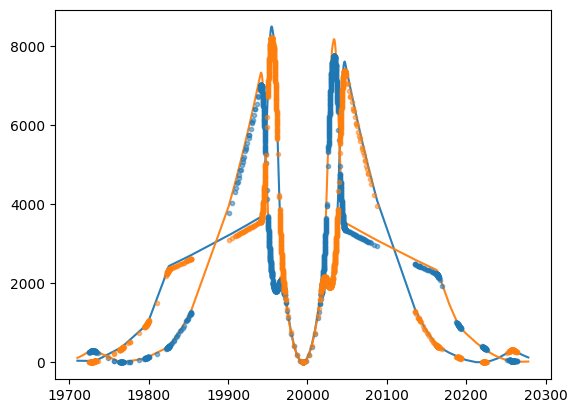

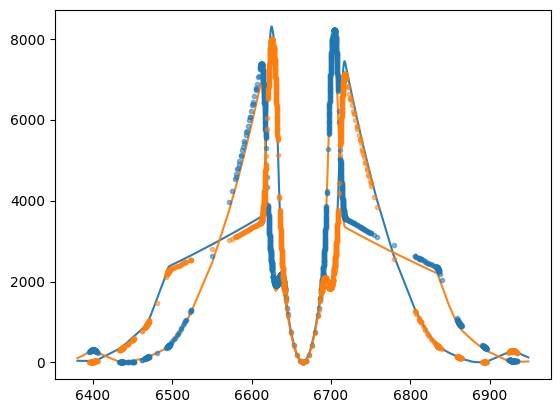

In [13]:
chosenIPs = ['ip1','ip5']
for _IP in chosenIPs:

    # ROI around IP
    beam='b1'
    ROI_twiss_b1  = twiss[beam].loc[f'mb.a8l{_IP[-1]}.{beam}_den':f'mb.a8r{_IP[-1]}.{beam}_dex'].copy()

    beam='b2'
    ROI_twiss_b2  = twiss[beam].loc[f'mb.a8l{_IP[-1]}.{beam}_den':f'mb.a8r{_IP[-1]}.{beam}_dex'].copy()


    # Plotting
    
    plt.figure()
    plt.plot(ROI_twiss_b1.s,ROI_twiss_b1.betx,color='C0',alpha=0.95)
    plt.plot(ROI_twiss_b1.s,ROI_twiss_b1.bety,color='C1',alpha=0.95)
    plt.plot(ROI_twiss_b2.s,ROI_twiss_b2.betx,'.',color='C0',alpha=0.3)
    plt.plot(ROI_twiss_b2.s,ROI_twiss_b2.bety,'.',color='C1',alpha=0.3)

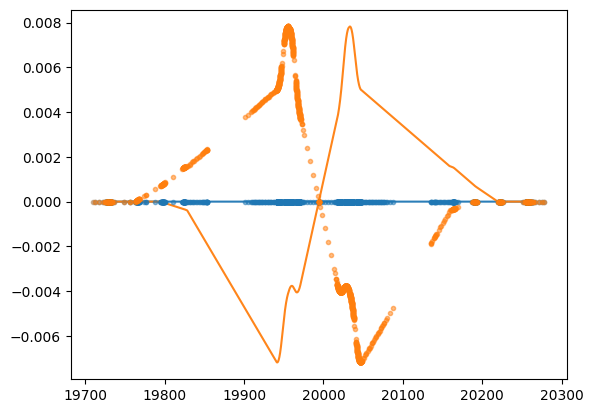

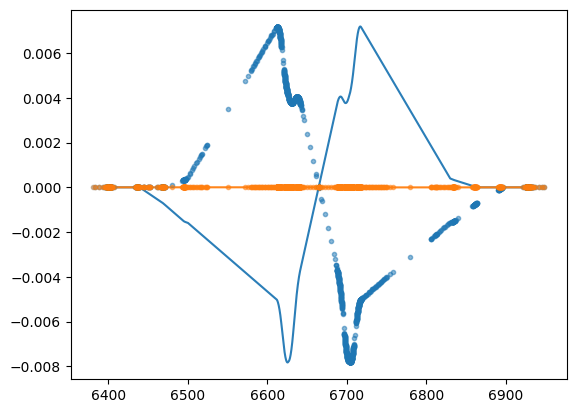

In [21]:
chosenIPs = ['ip1','ip5']
for _IP in chosenIPs:

    # ROI around IP
    beam='b1'
    ROI_twiss_b1  = twiss[beam].loc[f'mb.a8l{_IP[-1]}.{beam}_dex':f'mb.a8r{_IP[-1]}.{beam}_den'].copy()

    beam='b2'
    ROI_twiss_b2  = twiss[beam].loc[f'mb.a8l{_IP[-1]}.{beam}_dex':f'mb.a8r{_IP[-1]}.{beam}_den'].copy()
    #ROI_twiss          =  twiss.loc[f'mb.a8l{IP[-1]}.{beam}_dex':f'mb.a8r{IP[-1]}.{beam}_den'].copy()

    # Plotting
    
    plt.figure()
    plt.plot(ROI_twiss_b1.s,ROI_twiss_b1.x,color='C0',alpha=0.95)
    plt.plot(ROI_twiss_b1.s,ROI_twiss_b1.y,color='C1',alpha=0.95)
    plt.plot(ROI_twiss_b2.s,ROI_twiss_b2.x,'.',color='C0',alpha=0.3)
    plt.plot(ROI_twiss_b2.s,ROI_twiss_b2.y,'.',color='C1',alpha=0.3)

In [34]:
angle

1.5707963267948954

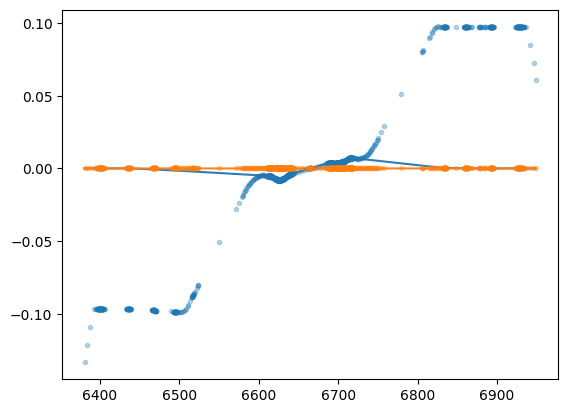

In [37]:
beam = 'b1'
_twiss  = twiss[beam]
_survey = survey[beam]
IP = 'ip5'

# ROI from dipoles
ROI_twiss  =  _twiss.loc[f'mb.a8l{IP[-1]}.{beam}_den':f'mb.a8r{IP[-1]}.{beam}_dex'].copy()
ROI_survey = _survey.loc[f'mb.a8l{IP[-1]}.{beam}_den':f'mb.a8r{IP[-1]}.{beam}_dex'].copy()


# Angle for rotation of survey
angle = -ROI_survey.loc[IP,'theta']

# Re-centering before rotating
z,x =  ROI_survey['z']-ROI_survey.loc[IP,'z'], ROI_survey['x']-ROI_survey.loc[IP,'x']
zz = z*np.cos(angle) - x*np.sin(angle)
xx = z*np.sin(angle) + x*np.cos(angle)

# Inserting in dataframe
ROI_survey.insert(1,'x_rot',xx)
ROI_survey.insert(2,'y_rot',ROI_survey['y'])
ROI_survey.insert(3,'z_rot',zz)
ROI_survey.insert(4,'s_rot',ROI_survey['s']-ROI_survey.loc[IP,'s'])

# Lab frame coordinates
ROI_twiss.insert(1,'x_lab',ROI_twiss['x'] + ROI_survey['x_rot'])
ROI_twiss.insert(2,'y_lab',ROI_twiss['y'] + ROI_survey['y_rot'])
ROI_twiss.insert(3,'s_lab',ROI_twiss['s'] - ROI_twiss.loc[IP,'s'])
    

    
plt.figure()
plt.plot(ROI_twiss.s,ROI_twiss.x,color='C0',alpha=0.95)
plt.plot(ROI_twiss.s,ROI_twiss.y,color='C1',alpha=0.95)
plt.plot(ROI_twiss.s,ROI_twiss.x_lab,'.',color='C0',alpha=0.3)
plt.plot(ROI_twiss.s,ROI_twiss.y_lab,'.',color='C1',alpha=0.3)

In [22]:
twiss['b1'].loc['bb_lr.l5b1_24','s']

6574.80788326135

In [24]:
twiss['b2'].loc['bb_lr.l5b2_24','s']

20083.770582251247

In [29]:
test['s']

name
ip3                 0.0000
drift_0             0.0000
mcbwv.4l3.b2       21.0300
drift_1            21.0300
bpmw.4l3.b2        22.5205
                   ...    
drift_30876     26636.4387
mcbwh.4r3.b2    26640.1832
drift_30877     26640.1832
lhcb2ip3_p_     26658.8832
_end_point      26658.8832
Name: s, Length: 61860, dtype: float64

(26000.0, 27000.0)

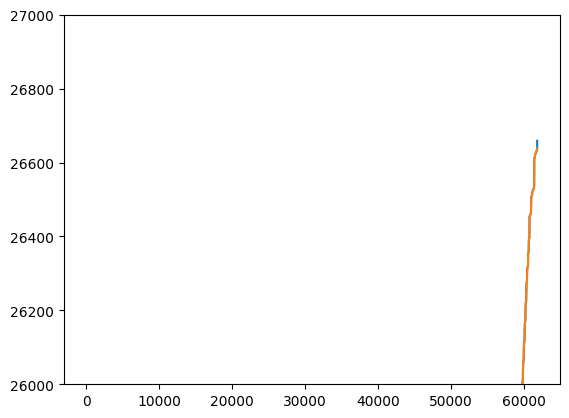

In [66]:
plt.figure()
plt.plot(test['s'].reset_index().index,-np.flip(test['s'])+lhcb2_L)
plt.plot(test['s'].reset_index().index,np.sort(np.mod(-np.flip(test['s'])+lhcb2_L,lhcb2_L)))
plt.ylim([26000,27000])

In [57]:
np.sort(-np.flip(test['s'])+lhcb2_L)

array([0.00000000e+00, 0.00000000e+00, 1.87000000e+01, ...,
       2.66378532e+04, 2.66588832e+04, 2.66588832e+04])

In [62]:
-np.flip(test['s'])+lhcb2_L

name
_end_point          0.0000
lhcb2ip3_p_         0.0000
drift_30877        18.7000
mcbwh.4r3.b2       18.7000
drift_30876        22.4445
                   ...    
bpmw.4l3.b2     26636.3627
drift_1         26637.8532
mcbwv.4l3.b2    26637.8532
drift_0         26658.8832
ip3             26658.8832
Name: s, Length: 61860, dtype: float64

In [78]:
(-test['s']+lhcb2_L).mod(lhcb2_L).sort_values()

name
ip3                    0.000000
lhcb2ip3_p_            0.000000
_end_point             0.000000
drift_0                0.000000
drift_30877           18.700000
                       ...     
mqwa.a4l3.b2..1    26635.755109
drift_2            26636.362700
bpmw.4l3.b2        26636.362700
mcbwv.4l3.b2       26637.853200
drift_1            26637.853200
Name: s, Length: 61860, dtype: float64

In [83]:
test = twiss['b2'].copy()
lhcb2_L = test.loc['_end_point','s']

test['s'] = (-test['s']+lhcb2_L).mod(lhcb2_L)
test.loc[['lhcb2ip3_p_','_end_point'],'s'] = lhcb2_L
test.sort_values(by='s',inplace=True)


In [84]:
test

,s,x,px,y,py,zeta,delta,ptau,betx,bety,...,dpx,dy,dpy,mux,muy,qx,qy,qs,dqx,dqy
name,,,,,,,,,,,,,,,,,,,,,
ip3,0.0000,6.331178e-07,1.115971e-08,-7.007505e-07,-8.359443e-09,-0.000002,0.000001,0.000001,128.116509,209.660230,...,0.007879,-0.483046,-0.005809,0.000000,0.000000,62.301068,60.311907,0.001867,13.697489,8.547012
drift_0,0.0000,6.331178e-07,1.115971e-08,-7.007505e-07,-8.359443e-09,-0.000002,0.000001,0.000001,128.116509,209.660230,...,0.007879,-0.483046,-0.005809,0.000000,0.000000,62.301068,60.311907,0.001867,13.697489,8.547012
drift_30877,18.7000,4.244316e-07,1.115971e-08,-5.444291e-07,-8.359443e-09,-0.000002,0.000001,0.000001,239.675467,127.613139,...,0.007870,-0.374264,-0.005811,62.284087,60.293710,62.301068,60.311907,0.001867,13.697489,8.547012
mcbwh.4r3.b2,18.7000,4.244316e-07,1.115971e-08,-5.444291e-07,-8.359443e-09,-0.000002,0.000001,0.000001,239.675467,127.613139,...,0.007870,-0.374264,-0.005811,62.284087,60.293710,62.301068,60.311907,0.001867,13.697489,8.547012
drift_30876,22.4445,3.826441e-07,1.115971e-08,-5.131272e-07,-8.359443e-09,-0.000002,0.000001,0.000001,266.655804,114.133428,...,0.007870,-0.352504,-0.005811,62.281735,60.288782,62.301068,60.311907,0.001867,13.697489,8.547012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bpmw.4l3.b2,26636.3627,8.844396e-07,1.115971e-08,-8.890090e-07,-8.359443e-09,-0.000002,0.000001,0.000001,45.059044,341.031579,...,0.007879,-0.613870,-0.005809,0.047786,0.013391,62.301068,60.311907,0.001867,13.697489,8.547012
drift_1,26637.8532,8.678061e-07,1.115971e-08,-8.765493e-07,-8.359443e-09,-0.000002,0.000001,0.000001,48.824647,331.237320,...,0.007879,-0.605212,-0.005809,0.042739,0.012687,62.301068,60.311907,0.001867,13.697489,8.547012
mcbwv.4l3.b2,26637.8532,8.678061e-07,1.115971e-08,-8.765493e-07,-8.359443e-09,-0.000002,0.000001,0.000001,48.824647,331.237320,...,0.007879,-0.605212,-0.005809,0.042739,0.012687,62.301068,60.311907,0.001867,13.697489,8.547012


In [85]:
twiss['b1']

,s,x,px,y,py,zeta,delta,ptau,betx,bety,...,dpx,dy,dpy,mux,muy,qx,qy,qs,dqx,dqy
name,,,,,,,,,,,,,,,,,,,,,
ip3,0.0000,-7.389495e-08,-2.101568e-08,6.588749e-07,9.071825e-09,0.000002,0.000001,0.000001,116.230362,211.252465,...,-0.014200,0.461392,0.006256,0.000000,0.000000,62.301108,60.312042,0.001867,14.190218,15.754116
drift_0,0.0000,-7.389495e-08,-2.101568e-08,6.588749e-07,9.071825e-09,0.000002,0.000001,0.000001,116.230362,211.252465,...,-0.014200,0.461392,0.006256,0.000000,0.000000,62.301108,60.312042,0.001867,14.190218,15.754116
mcbwv.4r3.b1,21.0300,-5.158540e-07,-2.101568e-08,8.496551e-07,9.071825e-09,0.000002,0.000001,0.000001,44.686189,332.022895,...,-0.014200,0.592964,0.006256,0.046545,0.012499,62.301108,60.312042,0.001867,14.190218,15.754116
drift_1,21.0300,-5.158540e-07,-2.101568e-08,8.496551e-07,9.071825e-09,0.000002,0.000001,0.000001,44.686189,332.022895,...,-0.014200,0.592964,0.006256,0.046545,0.012499,62.301108,60.312042,0.001867,14.190218,15.754116
bpmw.4r3.b1,22.5205,-5.471778e-07,-2.101568e-08,8.631766e-07,9.071825e-09,0.000002,0.000001,0.000001,41.353515,341.738141,...,-0.014200,0.602289,0.006256,0.051998,0.013195,62.301108,60.312042,0.001867,14.190218,15.754116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
drift_30803,26636.4387,3.977907e-07,-2.101568e-08,4.552625e-07,9.071823e-09,0.000002,0.000001,0.000001,243.110298,115.959833,...,-0.014187,0.320617,0.006255,62.280051,60.289415,62.301108,60.312042,0.001867,14.190218,15.754116
mcbwh.4l3.b1,26640.1832,3.190976e-07,-2.101568e-08,4.892319e-07,9.071823e-09,0.000002,0.000001,0.000001,218.317476,129.448613,...,-0.014187,0.344038,0.006255,62.282607,60.294222,62.301108,60.312042,0.001867,14.190218,15.754116
drift_30804,26640.1832,3.190976e-07,-2.101568e-08,4.892319e-07,9.071823e-09,0.000002,0.000001,0.000001,218.317476,129.448613,...,-0.014187,0.344038,0.006255,62.282607,60.294222,62.301108,60.312042,0.001867,14.190218,15.754116


In [50]:
np.mod(26637.8532,lhcb2_L),np.mod(0,lhcb2_L)

(26637.8532, 0.0)

In [41]:
twiss['b2'].tail(20)

,s,x,px,y,py,zeta,delta,ptau,betx,bety,...,dpx,dy,dpy,mux,muy,qx,qy,qs,dqx,dqy
name,,,,,,,,,,,,,,,,,,,,,
mqwa.a4r3.b2..26,26635.171789,3.684139e-07,1.147341e-08,-5.026611e-07,-7.933245e-09,-0.000002,0.000001,0.000001,275.999915,109.849827,...,0.008076,-0.345227,-0.005519,62.280993,60.286984,62.301068,60.311907,0.001867,13.697489,8.547012
drift_30869,26635.171789,3.684139e-07,1.142900e-08,-5.026611e-07,-7.993846e-09,-0.000002,0.000001,0.000001,275.999915,109.849827,...,0.008046,-0.345227,-0.005560,62.280993,60.286984,62.301068,60.311907,0.001867,13.697489,8.547012
mqwa.a4r3.b2..27,26635.269009,3.695250e-07,1.142900e-08,-5.034383e-07,-7.993846e-09,-0.000002,0.000001,0.000001,275.304992,110.163258,...,0.008046,-0.345767,-0.005560,62.281049,60.287125,62.301068,60.311907,0.001867,13.697489,8.547012
drift_30870,26635.269009,3.695250e-07,1.138445e-08,-5.034383e-07,-8.054541e-09,-0.000002,0.000001,0.000001,275.304992,110.163258,...,0.008017,-0.345767,-0.005602,62.281049,60.287125,62.301068,60.311907,0.001867,13.697489,8.547012
mqwa.a4r3.b2..28,26635.366229,3.706318e-07,1.138445e-08,-5.042214e-07,-8.054541e-09,-0.000002,0.000001,0.000001,274.604568,110.479893,...,0.008017,-0.346312,-0.005602,62.281105,60.287265,62.301068,60.311907,0.001867,13.697489,8.547012
drift_30871,26635.366229,3.706318e-07,1.133976e-08,-5.042214e-07,-8.115329e-09,-0.000002,0.000001,0.000001,274.604568,110.479893,...,0.007988,-0.346312,-0.005644,62.281105,60.287265,62.301068,60.311907,0.001867,13.697489,8.547012
mqwa.a4r3.b2..29,26635.463449,3.717343e-07,1.133976e-08,-5.050103e-07,-8.115329e-09,-0.000002,0.000001,0.000001,273.898675,110.799746,...,0.007988,-0.346861,-0.005644,62.281162,60.287404,62.301068,60.311907,0.001867,13.697489,8.547012
drift_30872,26635.463449,3.717343e-07,1.129495e-08,-5.050103e-07,-8.176213e-09,-0.000002,0.000001,0.000001,273.898675,110.799746,...,0.007959,-0.346861,-0.005686,62.281162,60.287404,62.301068,60.311907,0.001867,13.697489,8.547012
mqwa.a4r3.b2..30,26635.560669,3.728324e-07,1.129495e-08,-5.058052e-07,-8.176213e-09,-0.000002,0.000001,0.000001,273.187347,111.122833,...,0.007959,-0.347413,-0.005686,62.281218,60.287543,62.301068,60.311907,0.001867,13.697489,8.547012


In [3]:
_IP = 'ip5'
beam='b1'
display(twiss[beam].loc[f'mb.a8l{_IP[-1]}.{beam}_dex':f'mb.a8r{_IP[-1]}.{beam}_den'])
beam='b2'
display(twiss[beam].loc[f'mb.a8r{_IP[-1]}.{beam}_dex':f'mb.a8l{_IP[-1]}.{beam}_den'])

,s,x,px,y,py,zeta,delta,ptau,betx,bety,...,dpx,dy,dpy,mux,muy,qx,qy,qs,dqx,dqy
name,,,,,,,,,,,,,,,,,,,,,
mb.a8l5.b1_dex,6394.984680,-2.959142e-07,5.243747e-09,-7.804976e-07,-1.922751e-08,-0.000002,0.000001,0.000001,38.739284,254.930164,...,0.003456,-0.538928,-0.013194,14.677089,13.554301,62.301108,60.312042,0.001867,14.190218,15.754116
drift_6281,6394.984680,-2.959142e-07,5.243747e-09,-7.804976e-07,-1.922751e-08,-0.000002,0.000001,0.000001,38.739284,254.930164,...,0.003456,-0.538928,-0.013194,14.677089,13.554301,62.301108,60.312042,0.001867,14.190218,15.754116
mcs.a8l5.b1,6395.258433,-2.944787e-07,5.243747e-09,-7.857612e-07,-1.922751e-08,-0.000002,0.000001,0.000001,38.761833,258.355511,...,0.003456,-0.542540,-0.013194,14.678200,13.554469,62.301108,60.312042,0.001867,14.190218,15.754116
drift_6282,6395.258433,-2.944787e-07,5.243747e-09,-7.857612e-07,-1.922751e-08,-0.000002,0.000001,0.000001,38.761833,258.355511,...,0.003456,-0.542540,-0.013194,14.678200,13.554469,62.301108,60.312042,0.001867,14.190218,15.754116
e.ds.l5.b1,6395.664433,-2.923498e-07,5.243747e-09,-7.935675e-07,-1.922751e-08,-0.000002,0.000001,0.000001,38.802234,263.478751,...,0.003456,-0.547897,-0.013194,14.679845,13.554713,62.301108,60.312042,0.001867,14.190218,15.754116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mco.8r5.b1,6933.816433,-5.310200e-07,1.530618e-08,-1.891172e-07,7.514375e-09,0.000005,0.000001,0.000001,263.803303,21.223229,...,0.011215,-0.132434,0.005092,15.735218,14.643319,62.301108,60.312042,0.001867,14.190218,15.754116
drift_7846,6933.816433,-5.310200e-07,1.530618e-08,-1.891172e-07,7.514375e-09,0.000005,0.000001,0.000001,263.803303,21.223229,...,0.011215,-0.132434,0.005092,15.735218,14.643319,62.301108,60.312042,0.001867,14.190218,15.754116
mcd.8r5.b1,6933.817933,-5.309970e-07,1.530618e-08,-1.891059e-07,7.514375e-09,0.000005,0.000001,0.000001,263.786402,21.222605,...,0.011215,-0.132426,0.005092,15.735219,14.643330,62.301108,60.312042,0.001867,14.190218,15.754116


,s,x,px,y,py,zeta,delta,ptau,betx,bety,...,dpx,dy,dpy,mux,muy,qx,qy,qs,dqx,dqy
name,,,,,,,,,,,,,,,,,,,,,
mb.a8r5.b2_dex,19724.426280,1.679344e-07,-5.677033e-09,-7.121940e-07,-1.978483e-08,-0.000005,0.000001,0.000001,37.790008,239.582389,...,-0.003895,-0.494140,-0.013646,46.765533,45.264689,62.301068,60.311907,0.001867,13.697489,8.547012
drift_23031,19724.426280,1.679344e-07,-5.677033e-09,-7.121940e-07,-1.978483e-08,-0.000005,0.000001,0.000001,37.790008,239.582389,...,-0.003895,-0.494140,-0.013646,46.765533,45.264689,62.301068,60.311907,0.001867,13.697489,8.547012
mcd.8r5.b2,19724.760533,1.660368e-07,-5.677033e-09,-7.188071e-07,-1.978483e-08,-0.000005,0.000001,0.000001,37.806122,243.819799,...,-0.003895,-0.498702,-0.013646,46.766937,45.264909,62.301068,60.311907,0.001867,13.697489,8.547012
drift_23032,19724.760533,1.660368e-07,-5.677033e-09,-7.188071e-07,-1.978483e-08,-0.000005,0.000001,0.000001,37.806122,243.819799,...,-0.003895,-0.498702,-0.013646,46.766937,45.264909,62.301068,60.311907,0.001867,13.697489,8.547012
mco.8r5.b2,19724.762033,1.660283e-07,-5.677033e-09,-7.188368e-07,-1.978483e-08,-0.000005,0.000001,0.000001,37.806207,243.838900,...,-0.003895,-0.498722,-0.013646,46.766943,45.264910,62.301068,60.311907,0.001867,13.697489,8.547012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e.ds.l5.b2,20262.914033,2.271654e-07,-8.529285e-09,-1.909452e-07,6.662967e-09,0.000002,0.000001,0.000001,273.202744,17.249003,...,-0.006150,-0.132520,0.004436,47.825049,46.360070,62.301068,60.311907,0.001867,13.697489,8.547012
drift_24597,20262.914033,2.271654e-07,-8.529285e-09,-1.909452e-07,6.662967e-09,0.000002,0.000001,0.000001,273.202744,17.249003,...,-0.006150,-0.132520,0.004436,47.825049,46.360070,62.301068,60.311907,0.001867,13.697489,8.547012
mcs.a8l5.b2,20263.320033,2.237025e-07,-8.529285e-09,-1.882401e-07,6.662967e-09,0.000002,0.000001,0.000001,268.401834,17.041590,...,-0.006150,-0.130719,0.004436,47.825287,46.363830,62.301068,60.311907,0.001867,13.697489,8.547012


In [2]:
chosenIPs = ['ip1','ip5']
for _IP in chosenIPs:

    # ROI around IP
    ROI_twiss_b1,ROI_survey_b1 = inp.extract_IP_ROI(_IP,'b1',twiss['b1'],survey['b1'])
    ROI_twiss_b2,ROI_survey_b2 = inp.extract_IP_ROI(_IP,'b2',twiss['b2'],survey['b2'])

    
    _wires_b1 = [name for name in ROI_twiss_b1.index if ('bbcw' in name)&((f'{_IP[-1]}.u' in name)|(f'{_IP[-1]}.d' in name))]
    
    # Plotting
    
    fig, axes = plt.subplots(2, 1,figsize=(8,8))
    fig.suptitle(f'Beam position, {_IP}')
    for plane,ax in zip(['x','y'],axes.flatten()):
        
        center = ROI_twiss_b1.loc[_IP,f'{plane}_lab']
        ax.plot(ROI_twiss_b1['s_lab'],(ROI_twiss_b1[f'{plane}_lab']-center)/1e-3,'b-')
        ax.plot(ROI_twiss_b2['s_lab'],(ROI_twiss_b2[f'{plane}_lab']-center)/1e-3,'r-')
        
        print(40*'-')
        dist = []
        for wire in _wires_b1:
            
            ax.axvline(s_wire,color='k',ls='--')
            
            s_wire = ROI_twiss_b1.loc[wire,'s_lab']
            b1_pos = (ROI_twiss_b1.loc[wire,f'{plane}_lab']-center)
            b2_pos = np.interp(s_wire,ROI_twiss_b2['s_lab'],(ROI_twiss_b2[f'{plane}_lab']-center))
        
            dist.append(b2_pos-b1_pos)
        print(_IP,plane,np.mean(dist)/1e-3,' mm')
            
    
        ax.set(xlabel='s [m]', ylabel=f'{plane} [mm]')
    plt.tight_layout()

In [8]:
B1.bb

,s,x_lab,y_lab,s_lab,x,px,y,py,zeta,delta,...,dpx,dy,dpy,mux,muy,qx,qy,qs,dqx,dqy
name,,,,,,,,,,,,,,,,,,,,,
bb_lr.l1b1_25,19900.661828,-0.024290,-0.004746,-93.500572,-9.031667e-08,-4.647154e-10,-0.004746,-0.000060,0.000011,0.000001,...,-0.000285,-0.780409,-0.006543,46.123891,44.744801,62.301108,60.312042,0.001867,14.190182,15.754106
bb_lr.l1b1_24,19904.401851,-0.020067,-0.004971,-89.760549,-9.205471e-08,-4.647154e-10,-0.004971,-0.000060,0.000011,0.000001,...,-0.000285,-0.804656,-0.006543,46.124073,44.744945,62.301108,60.312042,0.001867,14.190182,15.754106
bb_lr.l1b1_23,19908.141873,-0.015845,-0.005196,-86.020527,-9.379276e-08,-4.647154e-10,-0.005196,-0.000060,0.000011,0.000001,...,-0.000285,-0.828904,-0.006543,46.124252,44.745080,62.301108,60.312042,0.001867,14.190182,15.754106
bb_lr.l1b1_22,19911.881896,-0.011692,-0.005422,-82.280504,-9.542849e-08,-1.893170e-10,-0.005422,-0.000060,0.000011,0.000001,...,-0.000097,-0.853151,-0.006543,46.124429,44.745207,62.301108,60.312042,0.001867,14.190182,15.754106
bb_lr.l1b1_21,19915.621919,-0.008173,-0.005647,-78.540481,-9.613654e-08,-1.893180e-10,-0.005647,-0.000060,0.000011,0.000001,...,-0.000097,-0.877399,-0.006543,46.124604,44.745326,62.301108,60.312042,0.001867,14.190182,15.754106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bb_lr.r1b1_21,20072.702881,0.008173,0.004220,78.540481,1.016355e-07,-3.370325e-09,0.004220,-0.000031,0.000009,0.000001,...,-0.002999,0.725366,-0.000864,46.617313,45.240709,62.301108,60.312042,0.001867,14.190182,15.754106
bb_lr.r1b1_22,20076.442904,0.011692,0.004106,82.280504,8.903047e-08,-3.370324e-09,0.004106,-0.000031,0.000009,0.000001,...,-0.002999,0.722248,-0.000864,46.617428,45.240891,62.301108,60.312042,0.001867,14.190182,15.754106
bb_lr.r1b1_23,20080.182927,0.015845,0.003991,86.020527,7.549771e-08,-3.645723e-09,0.003991,-0.000031,0.000009,0.000001,...,-0.003187,0.719130,-0.000864,46.617550,45.241075,62.301108,60.312042,0.001867,14.190182,15.754106


In [3]:
tracker.element_refs['mqwa.a4r3.b1..1'].knobs()

╭───────────────── <xtrack.beam_elements.elements.Multipole object at 0x7f88df4685e0> ─────────────────╮
│ ╭──────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ <BBStudies.Base.XsuitePlus.RenderingKnobs object at 0x7f8a3a5caf70>                              │ │
│ ╰──────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                      │
│              'vars['kq4.lr3']' = 0.001241284                                                         │
│               'vars['l.mqwa']' = 3.108                                                               │
│ ------------------------------ = '------------------------------'                                    │
│                            hxl = None                                                                │
│                            hyl = None                                                                │
│            inv_factorial_order = None                                                                │
│                            knl = "[None, (((0.0-vars['kq4.lr3'])*vars['l.mqwa'])/32.0), None, None]" │
│                            ksl = '[None, None, None, None]'                                          │
│                         length = "(vars['l.mqwa']/32.0)"                                             │
│                          order = None                                                                │
│                 radiation_flag = None                                                                │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [4]:
tracker.element_refs[MQ.index[0]].inspect()

╭───────────────────────── <class 'xtrack.beam_elements.elements.Multipole'> ──────────────────────────╮
│ Beam element modeling a thin magnetic multipole. Parameters:                                         │
│                                                                                                      │
│ ╭──────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ <xtrack.beam_elements.elements.Multipole object at 0x7fab72495850>                               │ │
│ ╰──────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                      │
│       extra_sources = NameError('`extra_sources` has been removed. Use `_extra_c_sources` instead.') │
│                 hxl = 0.0                                                                            │
│                 hyl = 0.0                                                                            │
│ inv_factorial_order = 0.16666666666666666                                                            │
│        iscollective = None                                                                           │
│                 knl = array([ 0.        , -0.00012056,  0.        ,  0.        ])                    │
│                 ksl = array([0., 0., 0., 0.])                                                        │
│              length = 0.097125                                                                       │
│               order = 3                                                                              │
│      radiation_flag = 0                                                                              │
│            XoStruct = NameError('`XoStruct` has been removed. Use `_XoStruct` instead.')             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [6]:
tracker.element_refs[wires.index[0]].knobs()

╭──── <xtrack.beam_elements.elements.Wire object at 0x7f0fc99733a0> ────╮
│ ╭───────────────────────────────────────────────────────────────────╮ │
│ │ <__main__.RenderingKnobs object at 0x7f112d095dc0>                │ │
│ ╰───────────────────────────────────────────────────────────────────╯ │
│                                                                       │
│         'bbcwe_current.4l5.b1' = 0.0                                  │
│           'bbcwe_xma.4l5.u.b1' = 0.9979225245831763                   │
│           'bbcwe_yma.4l5.u.b1' = 1.612292592790771e-07                │
│ ------------------------------ = '------------------------------'     │
│                        current = "(vars['bbcwe_current.4l5.b1']/2.0)" │
│                          L_int = None                                 │
│                          L_phy = None                                 │
│               post_subtract_px = None                                 │
│               post_subtract_py = None                                 │
│                            xma = "vars['bbcwe_xma.4l5.u.b1']"         │
│                            yma = "vars['bbcwe_yma.4l5.u.b1']"         │
╰───────────────────────────────────────────────────────────────────────╯

['bbcwe_current.4l5.b1', 'bbcwe_xma.4l5.u.b1', 'bbcwe_yma.4l5.u.b1']

In [7]:
test = tracker.element_refs[MQ.index[0]]
_fields = test._value._fields

sub_knobs   = []
print_names = {}
for key in _fields:

    _attr = getattr(test,key)

    # List or not list
    if isinstance(_attr._value, (type(np.array([])), list)):
        _expr = [_attr[i]._expr for i in range(len(_attr._value))]
    else:
        _expr = _attr._expr

    _expr = _attr._expr
    if _expr is None:
        print_names[key] = None
    else:
        print_names[key] = str(_expr)

    if str(_expr)[0] + str(_expr)[-1] == '[]':
        matches    = re.findall(r"[^[]*\[([^]]*)\]", str(_expr))
        sub_knobs += [m[1:-1] for m in matches]


In [10]:
key = 'knl'
_attr = getattr(test,key)

# List or not list
if isinstance(_attr._value, (type(np.array([])), list)):
    _expr = [_attr[i]._expr for i in range(len(_attr._value))]
else:
    _expr = _attr._expr


if _expr is None:
    print_names[key] = None
else:
    print_names[key] = str(_expr)

if str(_expr)[0] + str(_expr)[-1] == '[]':
    matches    = re.findall(r"[^[]*\[([^]]*)\]", str(_expr)[1:-1])
else:
    matches    = re.findall(r"[^[]*\[([^]]*)\]", str(_expr))
sub_knobs += [m[1:-1] for m in matches]

In [14]:
test.inspect(all=True)

╭─────────────────────────────── <class 'xtrack.beam_elements.elements.Multipole'> ───────────────────────────────╮
│ Beam element modeling a thin magnetic multipole. Parameters:                                                    │
│                                                                                                                 │
│ ╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ <xtrack.beam_elements.elements.Multipole object at 0x7ff816cf4700>                                          │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                                 │
│                _buffer = <BufferNumpy 2101592/7899392>                                                          │
│               _context = <xobjects.context_cpu.ContextCpu object at 0x7ff8bd20d220>                             │
│            _depends_on = [                                                                                      │
│                              <struct RecordIndex>,                                                              │
│                              <struct SynchrotronRadiationRecordData>,                                           │
│                              <struct ParticlesData>                                                             │
│                          ]                                                                                      │
│               __dict__ = {'_xobject': MultipoleData(...)}                                                       │
│                __doc__ = 'Beam element modeling a thin magnetic multipole. Parameters:\n\n            - order   │
│                          [int]: Horizontal shift. Default is ``0``.\n            - knl [m^-n, array]:           │
│                          Normalized integrated strength of the normal components.\n            - ksl [m^-n,     │
│                          array]: Normalized integrated strength of the skew components.\n            - hxl      │
│                          [rad]: Rotation angle of the reference trajectory in the horizontal plane.\n           │
│                          - hyl [rad]: Rotation angle of the reference trajectory in the vertical plane.\n       │
│                          - length [m]: Length of the originating thick multipole.\n\n    '                      │
│       _extra_c_sources = [                                                                                      │
│                              '\n/*gpufun*/\nSynchrotronRadiationRecordData                                      │
│                          MultipoleData_getp_internal_record(MultipoleData el, LocalParticle* part){\n           │
│                          RecordIdentifier record_id = MultipoleData_getp__internal_record_id(el);\n    if       │
│                          (RecordIdentifier_get_buffer_id(record_id) <= 0){\n        return NULL;\n    }\n       │
│                          else{\n        return (SynchrotronRadiationRecordData)                                 │
│                          RecordIdentifier_getp_record(record_id, part);\n    }\n    }\n    ',                   │
│                              PosixPath('/home/phbelang/abp/BBStudies/Executables/py_BB/xpart/xpart/random_numb… │
│                              PosixPath('/home/phbelang/abp/BBStudies/Executables/py_BB/xpart/xpart/random_numb… │
│                              PosixPath('/home/phbelang/abp/BBStudies/Executables/py_BB/xtrack/xtrack/headers/c… │
│                              PosixPath('/home/phbelang/abp/BBStudies/Executables/py_BB/xtrack/xtrack/headers/s… │
│                              PosixPath('/home/phbelang/abp/BBStudies/Executables/py_BB/xtrack/xtrack/beam_elem… │
│                              '\n            /*gpukern*

In [26]:
tracker.vars.inspect()

╭──────────────────── <class 'collections.defaultdict'> ────────────────────╮
│ defaultdict(default_factory=None, /, [...]) --> dict with default factory │
│                                                                           │
│ ╭───────────────────────────────────────────────────────────────────────╮ │
│ │ defaultdict(None, {                                                   │ │
│ │ │   'version': 50801.0,                                               │ │
│ │ │   'pi': 3.141592653589793,                                          │ │
│ │ │   'twopi': 6.283185307179586,                                       │ │
│ │ │   'degrad': 57.29577951308232,                                      │ │
│ │ │   'raddeg': 0.017453292519943295,                                   │ │
│ │ │   'e': 2.718281828459045,                                           │ │
│ │ │   'amu0': 1.2566370614359173e-06,                                   │ │
│ │ │   'emass': 0.00051099895,                                           │ │
│ │ │   'mumass': 0.1056583755,                                           │ │
│ │ │   'nmass': 0.93956542052,                                           │ │
│ │ │   ... +3305                                                         │ │
│ │ })                                                                    │ │
│ ╰───────────────────────────────────────────────────────────────────────╯ │
│                                                                           │
│ default_factory = None                                                    │
╰───────────────────────────────────────────────────────────────────────────╯

In [68]:
from xdeps.refs import ARef

In [65]:
ss = _expr[1]

In [66]:
ss

(((0.0-vars['kq4.lr3'])*vars['l.mqwa'])/32.0)

In [78]:
len(twiss)

61715

In [88]:
test._manager.containers['vars']['kq4.lr3']._value

0.001241284

In [70]:
owner = ARef._mk_value(ss._owner)

RecursionError: maximum recursion depth exceeded while calling a Python object

In [45]:
type(_expr[1])

xdeps.refs.TruedivRef

In [31]:
tracker.vars['kq4.lr3']._value

0.001241284

In [36]:
test._owner.vars['kq4.lr3']._value

AttributeError: 'dict' object has no attribute 'vars'

In [25]:
test._owner.inspect(all=True)

╭──────────────────────────────────────────────── <class 'dict'> ─────────────────────────────────────────────────╮
│ dict() -> new empty dictionary                                                                                  │
│ dict(mapping) -> new dictionary initialized from a mapping object's                                             │
│     (key, value) pairs                                                                                          │
│ dict(iterable) -> new dictionary initialized as if via:                                                         │
│     d = {}                                                                                                      │
│     for k, v in iterable:                                                                                       │
│         d[k] = v                                                                                                │
│ dict(**kwargs) -> new dictionary initialized with the name=value pairs                                          │
│     in the keyword argument list.  For example:  dict(one=1, two=2)                                             │
│                                                                                                                 │
│ ╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ {                                                                                                           │ │
│ │ │   'ip3': <xtrack.beam_elements.elements.Drift object at 0x7ff817b036d0>,                                  │ │
│ │ │   'drift_0': <xtrack.beam_elements.elements.Drift object at 0x7ff817b49d00>,                              │ │
│ │ │   'mcbwv.4r3.b1': <xtrack.beam_elements.elements.Multipole object at 0x7ff816cf4370>,                     │ │
│ │ │   'drift_1': <xtrack.beam_elements.elements.Drift object at 0x7ff817b85130>,                              │ │
│ │ │   'bpmw.4r3.b1': <xtrack.beam_elements.elements.Drift object at 0x7ff816cf4640>,                          │ │
│ │ │   'drift_2': <xtrack.beam_elements.elements.Drift object at 0x7ff816cf45b0>,                              │ │
│ │ │   'mqwa.a4r3.b1..1': <xtrack.beam_elements.elements.Multipole object at 0x7ff816cf4700>,                  │ │
│ │ │   'drift_3': <xtrack.beam_elements.elements.Drift object at 0x7ff816cecfd0>,                              │ │
│ │ │   'mqwa.a4r3.b1..2': <xtrack.beam_elements.elements.Multipole object at 0x7ff816cf4af0>,                  │ │
│ │ │   'drift_4': <xtrack.beam_elements.elements.Drift object at 0x7ff816cf4d60>,                              │ │
│ │ │   ... +61704                                                                                              │ │
│ │ }                                                                                                           │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                                 │
│           __doc__ = "dict() -> new empty dictionary\ndict(mapping) -> new dictionary initialized from a mapping │
│                     object's\n    (key, value) pairs\ndict(iterable) -> new dictionary initialized as if via:\n │
│                     d = {}\n    for k, v in iterable:\n        d[k] = v\ndict(**kwargs) -> new dictionary       │
│                     initialized with the name=value pairs\n    in the keyword argument list.  For example:      │
│                     dict(one=1, two=2)"                                                                         │
│          __hash__ = None                                                                                        │
│         __class__ = class __class__(...)                                                                        │
│                     dict() -> new empty dictionary    

In [22]:
test._owner._owner.vars['kq4.lr3']._value

AttributeError: 'dict' object has no attribute 'vars'

In [11]:
_attr

element_refs['mqwa.a4r3.b1..1'].knl

In [9]:
import re

In [21]:
sub_knobs

['l.mqwa', "one, (((0.0-vars['kq4.lr3", 'l.mqwa', 'kq4.lr3', 'l.mqwa']

'[]'

In [11]:
self._value.to_dict()[key]

element_refs['bb_lr.l5b1_25']

In [7]:
bb.index[0]

'bb_lr.l5b1_25'

In [6]:
bb    = twiss.loc[twiss.index.str.contains('bb_')]
wires = twiss.loc[twiss.index.str.contains('bbcw')]

In [18]:
bb_ho    = twiss.loc[twiss.index.str.contains('bb_ho')]

In [39]:
MQ = twiss.loc[twiss.index.str.contains('mq')]

In [40]:
MQ

,s,x,px,y,py,zeta,delta,ptau,betx,bety,...,dpx,dy,dpy,mux,muy,qx,qy,qs,dqx,dqy
name,,,,,,,,,,,,,,,,,,,,,
mqwa.a4r3.b1..1,23.128091,-5.599468e-07,-2.101568e-08,8.686885e-07,9.071824e-09,0.000002,0.000001,0.000001,40.060984,345.742383,...,-0.014200,0.606090,0.006256,0.054346,0.013473,62.301108,60.312042,0.001867,14.190182,15.754106
mqwa.a4r3.b1..2,23.225311,-5.619965e-07,-2.108319e-08,8.695603e-07,8.967095e-09,0.000002,0.000001,0.000001,39.858652,346.377342,...,-0.014246,0.606692,0.006183,0.054728,0.013517,62.301108,60.312042,0.001867,14.190182,15.754106
mqwa.a4r3.b1..3,23.322531,-5.640528e-07,-2.115094e-08,8.704219e-07,8.862262e-09,0.000002,0.000001,0.000001,39.658225,347.004811,...,-0.014292,0.607286,0.006110,0.055113,0.013561,62.301108,60.312042,0.001867,14.190182,15.754106
mqwa.a4r3.b1..4,23.419751,-5.661157e-07,-2.121894e-08,8.712733e-07,8.757324e-09,0.000002,0.000001,0.000001,39.459696,347.624759,...,-0.014338,0.607872,0.006037,0.055499,0.013605,62.301108,60.312042,0.001867,14.190182,15.754106
mqwa.a4r3.b1..5,23.516971,-5.681852e-07,-2.128719e-08,8.721144e-07,8.652283e-09,0.000002,0.000001,0.000001,39.263053,348.237158,...,-0.014384,0.608452,0.005964,0.055887,0.013649,62.301108,60.312042,0.001867,14.190182,15.754106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mqwa.a4l3.b1..28,26635.366229,4.202810e-07,-2.076478e-08,4.455858e-07,8.802182e-09,0.000002,0.000001,0.000001,250.420282,112.300778,...,-0.014019,0.313946,0.006065,62.279368,60.287937,62.301108,60.312042,0.001867,14.190182,15.754106
mqwa.a4l3.b1..29,26635.463449,4.182573e-07,-2.081545e-08,4.464468e-07,8.855901e-09,0.000002,0.000001,0.000001,249.770872,112.621061,...,-0.014053,0.314539,0.006103,62.279429,60.288073,62.301108,60.312042,0.001867,14.190182,15.754106
mqwa.a4l3.b1..30,26635.560669,4.162287e-07,-2.086587e-08,4.473130e-07,8.909725e-09,0.000002,0.000001,0.000001,249.116532,112.944608,...,-0.014087,0.315136,0.006141,62.279490,60.288209,62.301108,60.312042,0.001867,14.190182,15.754106


In [20]:

bb_ho.index[0]

'bb_ho.l5b1_05'

In [76]:
test._value.to_dict()

{'__class__': 'Multipole',
 'order': 3,
 'inv_factorial_order': 0.16666666666666666,
 'length': 0.097125,
 'hxl': 0.0,
 'hyl': 0.0,
 'radiation_flag': 0,
 'knl': array([ 0.        , -0.00012056,  0.        ,  0.        ]),
 'ksl': array([0., 0., 0., 0.])}

In [89]:
#test = line.element_refs[MQ.index[0]]
isinstance(test._value.to_dict()['knl'], (type(np.array([])), list))

True

In [85]:
type(test._value.to_dict()['knl'])

numpy.ndarray

In [69]:
#expr = self[key]._expr
 #       if _expr is None:
 #           print_names[key] = None
test['knl']._value

TypeError: 'Multipole' object is not subscriptable

In [57]:
test = line.element_refs[MQ.index[0]]

In [46]:
line.element_refs[MQ.index[0]].knl[1]._expr

(((0.0-vars['kq4.lr3'])*vars['l.mqwa'])/32.0)

In [41]:
line.element_refs[MQ.index[0]].knobs()

╭─ <xtrack.beam_elements.elements.Multipole object at 0x7efc701ab280> ─╮
│ ╭──────────────────────────────────────────────────────────────────╮ │
│ │ <__main__.RenderingKnobs object at 0x7efd0ef8e040>               │ │
│ ╰──────────────────────────────────────────────────────────────────╯ │
│                                                                      │
│                       'l.mqwa' = 3.108                               │
│ ------------------------------ = '------------------------------'    │
│                            hxl = None                                │
│                            hyl = None                                │
│            inv_factorial_order = None                                │
│                            knl = None                                │
│                            ksl = None                                │
│                         length = "(vars['l.mqwa']/32.0)"             │
│                          order = None                                │
│                 radiation_flag = None                                │
╰──────────────────────────────────────────────────────────────────────╯

['l.mqwa']

In [62]:
line.element_refs[bb_ho.index[0]].inspect()

╭──────────────────────── <class 'xfields.beam_elements.beambeam3d.BeamBeamBiGaussian3D'> ────────────────────────╮
│ ╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ <xfields.beam_elements.beambeam3d.BeamBeamBiGaussian3D object at 0x7efc6fab1070>                            │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                                 │
│                               alpha = -5.615935821345693e-05                                                    │
│                           cos_alpha = 0.9999999984230632                                                        │
│                             cos_phi = 0.9999999871995052                                                        │
│                       extra_sources = NameError('`extra_sources` has been removed. Use `_extra_c_sources`       │
│                                       instead.')                                                                │
│                        iscollective = None                                                                      │
│                      min_sigma_diff = 1e-10                                                                     │
│               num_slices_other_beam = 1                                                                         │
│                       other_beam_q0 = 1.0                                                                       │
│                 other_beam_shift_px = 0.0                                                                       │
│                 other_beam_shift_py = 0.0                                                                       │
│              other_beam_shift_pzeta = 0.0                                                                       │
│                  other_beam_shift_x = 2.188410326198209e-05                                                     │
│                  other_beam_shift_y = -3.80887873355759e-10                                                     │
│               other_beam_shift_zeta = 0.0                                                                       │
│                                 phi = 0.00016000309237227425                                                    │
│                    post_subtract_px = -1.7207635840719797e-07                                                   │
│                    post_subtract_py = 2.9949501435730493e-12                                                    │
│                 post_subtract_pzeta = -2.7694735393879455e-11                                                   │
│                     post_subtract_x = -6.02528416699874e-16                                                     │
│                     post_subtract_y = 1.0486995805947285e-20                                                    │
│                  post_subtract_zeta = -5.293955920339377e-23                                                    │
│                        ref_shift_px = 0.0001600520883506779                                                     │
│                        ref_shift_py = -9.503772632898359e-08                                                    │
│                     ref_shift_pzeta = 1.4635211964542094e-06                                                    │
│                         ref_shift_x = -1.0934280071835502e-05                                                   │
│                         ref_shift_y = 1.082636046306463e-08                                                     │
│                      ref_shift_zeta = -2.37407297905032e-07                                                     │
│                           sin_alpha = -5.6159358183937014e-05                                                   │
│                             sin_phi = 0.00016000309168

In [66]:
line.element_refs[bb_ho.index[0]]._value.to_dict()

{'__class__': 'BeamBeamBiGaussian3D',
 '_sin_phi': 0.000160003091689568,
 '_cos_phi': 0.9999999871995052,
 '_tan_phi': 0.00016000309373768675,
 '_sin_alpha': -5.6159358183937014e-05,
 '_cos_alpha': 0.9999999984230632,
 'ref_shift_x': -1.0934280071835502e-05,
 'ref_shift_px': 0.0001600520883506779,
 'ref_shift_y': 1.082636046306463e-08,
 'ref_shift_py': -9.503772632898359e-08,
 'ref_shift_zeta': -2.37407297905032e-07,
 'ref_shift_pzeta': 1.4635211964542094e-06,
 'other_beam_shift_x': 2.188410326198209e-05,
 'other_beam_shift_px': 0.0,
 'other_beam_shift_y': -3.80887873355759e-10,
 'other_beam_shift_py': 0.0,
 'other_beam_shift_zeta': 0.0,
 'other_beam_shift_pzeta': 0.0,
 'post_subtract_x': -6.02528416699874e-16,
 'post_subtract_px': -1.7207635840719797e-07,
 'post_subtract_y': 1.0486995805947285e-20,
 'post_subtract_py': 2.9949501435730493e-12,
 'post_subtract_zeta': -5.293955920339377e-23,
 'post_subtract_pzeta': -2.7694735393879455e-11,
 'other_beam_q0': 1.0,
 'num_slices_other_beam':

In [21]:
tracker.element_refs[bb_ho.index[0]].inspect()

generating ./09b316bea0114ab8a8d15d7132225d1e.c
the current directory is '/home/phbelang/abp/BBStudies/Tests'
running build_ext
building '09b316bea0114ab8a8d15d7132225d1e' extension
gcc -pthread -B /home/phbelang/abp/BBStudies/Executables/miniconda/compiler_compat -Wno-unused-result -Wsign-compare -DNDEBUG -O2 -Wall -fPIC -O2 -isystem /home/phbelang/abp/BBStudies/Executables/miniconda/include -I/home/phbelang/abp/BBStudies/Executables/miniconda/include -fPIC -O2 -isystem /home/phbelang/abp/BBStudies/Executables/miniconda/include -fPIC -I/home/phbelang/abp/BBStudies/Executables/py_BB/include -I/home/phbelang/abp/BBStudies/Executables/miniconda/include/python3.9 -c 09b316bea0114ab8a8d15d7132225d1e.c -o ./09b316bea0114ab8a8d15d7132225d1e.o -std=c99 -O3 -Wno-unused-function
gcc -pthread -B /home/phbelang/abp/BBStudies/Executables/miniconda/compiler_compat -shared -Wl,-rpath,/home/phbelang/abp/BBStudies/Executables/miniconda/lib -Wl,-rpath-link,/home/phbelang/abp/BBStudies/Executables/minic

╭──────────────────────── <class 'xfields.beam_elements.beambeam3d.BeamBeamBiGaussian3D'> ────────────────────────╮
│ ╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ <xfields.beam_elements.beambeam3d.BeamBeamBiGaussian3D object at 0x7efc6fab1070>                            │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                                 │
│                               alpha = -5.615935821345693e-05                                                    │
│                           cos_alpha = 0.9999999984230632                                                        │
│                             cos_phi = 0.9999999871995052                                                        │
│                       extra_sources = NameError('`extra_sources` has been removed. Use `_extra_c_sources`       │
│                                       instead.')                                                                │
│                        iscollective = None                                                                      │
│                      min_sigma_diff = 1e-10                                                                     │
│               num_slices_other_beam = 1                                                                         │
│                       other_beam_q0 = 1.0                                                                       │
│                 other_beam_shift_px = 0.0                                                                       │
│                 other_beam_shift_py = 0.0                                                                       │
│              other_beam_shift_pzeta = 0.0                                                                       │
│                  other_beam_shift_x = 2.188410326198209e-05                                                     │
│                  other_beam_shift_y = -3.80887873355759e-10                                                     │
│               other_beam_shift_zeta = 0.0                                                                       │
│                                 phi = 0.00016000309237227425                                                    │
│                    post_subtract_px = -1.7207635840719797e-07                                                   │
│                    post_subtract_py = 2.9949501435730493e-12                                                    │
│                 post_subtract_pzeta = -2.7694735393879455e-11                                                   │
│                     post_subtract_x = -6.02528416699874e-16                                                     │
│                     post_subtract_y = 1.0486995805947285e-20                                                    │
│                  post_subtract_zeta = -5.293955920339377e-23                                                    │
│                        ref_shift_px = 0.0001600520883506779                                                     │
│                        ref_shift_py = -9.503772632898359e-08                                                    │
│                     ref_shift_pzeta = 1.4635211964542094e-06                                                    │
│                         ref_shift_x = -1.0934280071835502e-05                                                   │
│                         ref_shift_y = 1.082636046306463e-08                                                     │
│                      ref_shift_zeta = -2.37407297905032e-07                                                     │
│                           sin_alpha = -5.6159358183937014e-05                                                   │
│                             sin_phi = 0.00016000309168

In [11]:
sub_knobs = tracker.element_refs[wires.index[0]].knobs()

╭──── <xtrack.beam_elements.elements.Wire object at 0x7fd3e6976760> ────╮
│ ╭───────────────────────────────────────────────────────────────────╮ │
│ │ <__main__.RenderingKnobs object at 0x7fd3da731e50>                │ │
│ ╰───────────────────────────────────────────────────────────────────╯ │
│                                                                       │
│         'bbcwe_current.4l5.b1' = 0.0                                  │
│           'bbcwe_xma.4l5.u.b1' = 0.9979225245831763                   │
│           'bbcwe_yma.4l5.u.b1' = 1.612292592790771e-07                │
│ ------------------------------ = '------------------------------'     │
│                        current = "(vars['bbcwe_current.4l5.b1']/2.0)" │
│                          L_int = None                                 │
│                          L_phy = None                                 │
│               post_subtract_px = None                                 │
│               post_subtract_py = None                                 │
│                            xma = "vars['bbcwe_xma.4l5.u.b1']"         │
│                            yma = "vars['bbcwe_yma.4l5.u.b1']"         │
╰───────────────────────────────────────────────────────────────────────╯

In [14]:
tracker.vars[sub_knobs[0]].knobs()

AttributeError: 'float' object has no attribute '_fields'

In [16]:
tracker.vars[sub_knobs[0]].inspect()

╭────────────────────────── <class 'float'> ──────────────────────────╮
│ Convert a string or number to a floating point number, if possible. │
│                                                                     │
│ ╭─────────────────────────────────────────────────────────────────╮ │
│ │ 0.0                                                             │ │
│ ╰─────────────────────────────────────────────────────────────────╯ │
│                                                                     │
│ imag = 0.0                                                          │
│ real = 0.0                                                          │
╰─────────────────────────────────────────────────────────────────────╯

In [134]:
tracker.element_refs[wires.index[0]].current._expr

(vars['bbcwe_current.4l5.b1']/2.0)

In [135]:
tracker.vars['bbcwe_current.4l5.b1']._info()

#  vars['bbcwe_current.4l5.b1']._get_value()
   vars['bbcwe_current.4l5.b1'] = 350.0

#  vars['bbcwe_current.4l5.b1']._expr
   vars['bbcwe_current.4l5.b1'] = vars['bbcw_i_ip5.b1']

#  vars['bbcwe_current.4l5.b1']._expr._get_dependencies()
   vars['bbcw_i_ip5.b1'] = 350.0

#  vars['bbcwe_current.4l5.b1']._find_dependant_targets()
   element_refs['bbcwe_wire.4l5.d.b1'].current
   element_refs['bbcwe_wire.4l5.u.b1'].current



In [139]:
import rich

In [142]:
rich.inspect(rich.inspect)

╭───────────────────────────────────── <function inspect at 0x7f4eccfe4b80> ──────────────────────────────────────╮
│ def inspect(obj: Any, *, console: Optional[ForwardRef('Console')] = None, title: Optional[str] = None, help:    │
│ bool = False, methods: bool = False, docs: bool = True, private: bool = False, dunder: bool = False, sort: bool │
│ = True, all: bool = False, value: bool = True) -> None:                                                         │
│                                                                                                                 │
│ Inspect any Python object.                                                                                      │
│                                                                                                                 │
│ * inspect(<OBJECT>) to see summarized info.                                                                     │
│ * inspect(<OBJECT>, methods=True) to see methods.                                                               │
│ * inspect(<OBJECT>, help=True) to see full (non-abbreviated) help.                                              │
│ * inspect(<OBJECT>, private=True) to see private attributes (single underscore).                                │
│ * inspect(<OBJECT>, dunder=True) to see attributes beginning with double underscore.                            │
│ * inspect(<OBJECT>, all=True) to see all attributes.                                                            │
│                                                                                                                 │
│ Args:                                                                                                           │
│     obj (Any): An object to inspect.                                                                            │
│     title (str, optional): Title to display over inspect result, or None use type. Defaults to None.            │
│     help (bool, optional): Show full help text rather than just first paragraph. Defaults to False.             │
│     methods (bool, optional): Enable inspection of callables. Defaults to False.                                │
│     docs (bool, optional): Also render doc strings. Defaults to True.                                           │
│     private (bool, optional): Show private attributes (beginning with underscore). Defaults to False.           │
│     dunder (bool, optional): Show attributes starting with double underscore. Defaults to False.                │
│     sort (bool, optional): Sort attributes alphabetically. Defaults to True.                                    │
│     all (bool, optional): Show all attributes. Defaults to False.                                               │
│     value (bool, optional): Pretty print value. Defaults to True.                                               │
│                                                                                                                 │
│ 35 attribute(s) not shown. Run inspect(inspect) for options.                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [77]:
inspect(inspect)

╭───────────────────────────────────── <function inspect at 0x7f4eccfe4b80> ──────────────────────────────────────╮
│ def inspect(obj: Any, *, console: Optional[ForwardRef('Console')] = None, title: Optional[str] = None, help:    │
│ bool = False, methods: bool = False, docs: bool = True, private: bool = False, dunder: bool = False, sort: bool │
│ = True, all: bool = False, value: bool = True) -> None:                                                         │
│                                                                                                                 │
│ Inspect any Python object.                                                                                      │
│                                                                                                                 │
│ * inspect(<OBJECT>) to see summarized info.                                                                     │
│ * inspect(<OBJECT>, methods=True) to see methods.                                                               │
│ * inspect(<OBJECT>, help=True) to see full (non-abbreviated) help.                                              │
│ * inspect(<OBJECT>, private=True) to see private attributes (single underscore).                                │
│ * inspect(<OBJECT>, dunder=True) to see attributes beginning with double underscore.                            │
│ * inspect(<OBJECT>, all=True) to see all attributes.                                                            │
│                                                                                                                 │
│ Args:                                                                                                           │
│     obj (Any): An object to inspect.                                                                            │
│     title (str, optional): Title to display over inspect result, or None use type. Defaults to None.            │
│     help (bool, optional): Show full help text rather than just first paragraph. Defaults to False.             │
│     methods (bool, optional): Enable inspection of callables. Defaults to False.                                │
│     docs (bool, optional): Also render doc strings. Defaults to True.                                           │
│     private (bool, optional): Show private attributes (beginning with underscore). Defaults to False.           │
│     dunder (bool, optional): Show attributes starting with double underscore. Defaults to False.                │
│     sort (bool, optional): Sort attributes alphabetically. Defaults to True.                                    │
│     all (bool, optional): Show all attributes. Defaults to False.                                               │
│     value (bool, optional): Pretty print value. Defaults to True.                                               │
│                                                                                                                 │
│ 35 attribute(s) not shown. Run inspect(inspect) for options.                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [25]:
tracker.element_refs['bb_lr.l5b1_24']._fields._value

['ref_shift_x',
 'ref_shift_y',
 'other_beam_shift_x',
 'other_beam_shift_y',
 'post_subtract_px',
 'post_subtract_py',
 'other_beam_q0',
 'other_beam_beta0',
 'other_beam_num_particles',
 'other_beam_Sigma_11',
 'other_beam_Sigma_13',
 'other_beam_Sigma_33',
 'min_sigma_diff']

In [13]:
tracker.element_refs['bb_lr.l5b1_24'].inspect()

╭───────────────────── <class 'xfields.beam_elements.beambeam2d.BeamBeamBiGaussian2D'> ─────────────────────╮
│ ╭───────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ <xfields.beam_elements.beambeam2d.BeamBeamBiGaussian2D object at 0x7f31a4e75430>                      │ │
│ ╰───────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                           │
│                    beta0 = 0.9999999904805956                                                             │
│                     d_px = -9.512864770813267e-10                                                         │
│                     d_py = 1.1542021845846554e-14                                                         │
│            extra_sources = NameError('`extra_sources` has been removed. Use `_extra_c_sources` instead.') │
│             iscollective = None                                                                           │
│                   mean_x = 0.045103007821666624                                                           │
│                   mean_y = 2.7660195734916006e-06                                                         │
│           min_sigma_diff = 1e-10                                                                          │
│              n_particles = 110000000000.0                                                                 │
│         other_beam_beta0 = 0.9999999904805956                                                             │
│ other_beam_num_particles = 110000000000.0                                                                 │
│            other_beam_q0 = 1.0                                                                            │
│       other_beam_shift_x = 0.045103007821666624                                                           │
│       other_beam_shift_y = 2.7660195734916006e-06                                                         │
│      other_beam_Sigma_11 = 1.4395161113838154e-06                                                         │
│      other_beam_Sigma_13 = 0.0                                                                            │
│      other_beam_Sigma_33 = 1.0699171911390306e-06                                                         │
│         post_subtract_px = -9.512864770813267e-10                                                         │
│         post_subtract_py = 1.1542021845846554e-14                                                         │
│                       q0 = 1.0                                                                            │
│              ref_shift_x = 0.0                                                                            │
│              ref_shift_y = 0.0                                                                            │
│                  sigma_x = 0.0011997983628026067                                                          │
│                  sigma_y = 0.001034368015330632                                                           │
│                 XoStruct = NameError('`XoStruct` has been removed. Use `_XoStruct` instead.')             │
╰───────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [58]:
tracker.element_refs[wires.index[0]]._value._fields

['L_phy',
 'L_int',
 'current',
 'xma',
 'yma',
 'post_subtract_px',
 'post_subtract_py']

In [71]:
tracker.element_refs[wires.index[0]].inspect(all=True)

╭───────────────────────────────── <class 'xtrack.beam_elements.elements.Wire'> ──────────────────────────────────╮
│ ╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ <xtrack.beam_elements.elements.Wire object at 0x7f31a4e71a30>                                               │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                                 │
│               _buffer = <BufferNumpy 2101592/7899392>                                                           │
│              _context = <xobjects.context_cpu.ContextCpu object at 0x7f3247a122e0>                              │
│               current = 0.0                                                                                     │
│           _depends_on = [<struct ParticlesData>]                                                                │
│              __dict__ = {'_xobject': WireData(...)}                                                             │
│               __doc__ = None                                                                                    │
│      _extra_c_sources = [                                                                                       │
│                             PosixPath('/home/phbelang/abp/BBStudies/Executables/py_BB/xtrack/xtrack/headers/co… │
│                             PosixPath('/home/phbelang/abp/BBStudies/Executables/py_BB/xtrack/xtrack/beam_eleme… │
│                             '\n            /*gpukern*/\n            void Wire_track_particles(\n                │
│                         WireData el,\n\n                             ParticlesData particles,\n\n               │
│                         int64_t flag_increment_at_element,\n                /*gpuglmem*/ int8_t* io_buffer){\n  │
│                         LocalParticle lpart;\n            lpart.io_buffer = io_buffer;\n\n            int64_t   │
│                         part_id = 0;                    //only_for_context cpu_serial cpu_openmp\n              │
│                         int64_t part_id = blockDim.x * blockIdx.x + threadIdx.x; //only_for_context cuda\n      │
│                         int64_t part_id = get_global_id(0);                    //only_for_context opencl\n\n    │
│                         int64_t part_capacity = ParticlesData_get__capacity(particles);\n            if         │
│                         (part_id<part_capacity){\n                Particles_to_LocalParticle(particles, &lpart, │
│                         part_id);\n                if (check_is_active(&lpart)>0){\n                            │
│                         Wire_track_local_particle(el, &lpart);\n\n                }\n                if         │
│                         (check_is_active(&lpart)>0 && flag_increment_at_element){\n                             │
│                         increment_at_element(&lpart);\n                }\n            }\n        }\n'           │
│                         ]                                                                                       │
│         extra_sources = NameError('`extra_sources` has been removed. Use `_extra_c_sources` instead.')          │
│               _fields = ['L_phy', 'L_int', 'current', 'xma', 'yma', 'post_subtract_px', 'post_subtract_py']     │
│       _inverse_rename = {}                                                                                      │
│          iscollective = None                                                                                    │
│              _kernels = {'Wire_track_particles': <xobjects.context.Kernel object at 0x7f31a63a0610>}            │
│                 L_int = 2.0                                                                                     │
│                 L_phy = 1.0                           

In [143]:


ARef.knobs = knobs

tracker.element_refs[wires.index[0]].knobs()
tracker.element_refs['bb_lr.l5b1_24'].knobs()

╭──── <xtrack.beam_elements.elements.Wire object at 0x7f31a4e71a30> ────╮
│ ╭───────────────────────────────────────────────────────────────────╮ │
│ │ <__main__.RenderingKnobs object at 0x7f323afef2e0>                │ │
│ ╰───────────────────────────────────────────────────────────────────╯ │
│                                                                       │
│         'bbcwe_current.4l5.b1' = 0.0                                  │
│           'bbcwe_xma.4l5.u.b1' = 0.9979225245831763                   │
│           'bbcwe_yma.4l5.u.b1' = 1.612292592790771e-07                │
│ ------------------------------ = '------------------------------'     │
│                        current = "(vars['bbcwe_current.4l5.b1']/2.0)" │
│                          L_int = None                                 │
│                          L_phy = None                                 │
│               post_subtract_px = None                                 │
│               post_subtract_py = None                                 │
│                            xma = "vars['bbcwe_xma.4l5.u.b1']"         │
│                            yma = "vars['bbcwe_yma.4l5.u.b1']"         │
╰───────────────────────────────────────────────────────────────────────╯

╭─ <xfields.beam_elements.beambeam2d.BeamBeamBiGaussian2D object at 0x7f31a4e75430> ─╮
│ ╭────────────────────────────────────────────────────────────────────────────────╮ │
│ │ <__main__.RenderingKnobs object at 0x7f32336a4400>                             │ │
│ ╰────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                    │
│ ------------------------------ = '------------------------------'                  │
│                 min_sigma_diff = None                                              │
│               other_beam_beta0 = None                                              │
│       other_beam_num_particles = None                                              │
│                  other_beam_q0 = None                                              │
│             other_beam_shift_x = None                                              │
│             other_beam_shift_y = None                                              │
│            other_beam_Sigma_11 = None                                              │
│            other_beam_Sigma_13 = None                                              │
│            other_beam_Sigma_33 = None                                              │
│               post_subtract_px = None                                              │
│               post_subtract_py = None                                              │
│                    ref_shift_x = None                                              │
│                    ref_shift_y = None                                              │
╰────────────────────────────────────────────────────────────────────────────────────╯

[]

'<xtrack.beam_elements.elements.Wire object at 0x7f31a4e71a30>'

In [138]:
tracker.element_refs[wires.index[0]].inspect(all=True)

╭───────────────────────────────── <class 'xtrack.beam_elements.elements.Wire'> ──────────────────────────────────╮
│ ╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ <xtrack.beam_elements.elements.Wire object at 0x7f31a4e71a30>                                               │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                                 │
│               _buffer = <BufferNumpy 2101592/7899392>                                                           │
│              _context = <xobjects.context_cpu.ContextCpu object at 0x7f3247a122e0>                              │
│               current = 0.0                                                                                     │
│           _depends_on = [<struct ParticlesData>]                                                                │
│              __dict__ = {'_xobject': WireData(...)}                                                             │
│               __doc__ = None                                                                                    │
│      _extra_c_sources = [                                                                                       │
│                             PosixPath('/home/phbelang/abp/BBStudies/Executables/py_BB/xtrack/xtrack/headers/co… │
│                             PosixPath('/home/phbelang/abp/BBStudies/Executables/py_BB/xtrack/xtrack/beam_eleme… │
│                             '\n            /*gpukern*/\n            void Wire_track_particles(\n                │
│                         WireData el,\n\n                             ParticlesData particles,\n\n               │
│                         int64_t flag_increment_at_element,\n                /*gpuglmem*/ int8_t* io_buffer){\n  │
│                         LocalParticle lpart;\n            lpart.io_buffer = io_buffer;\n\n            int64_t   │
│                         part_id = 0;                    //only_for_context cpu_serial cpu_openmp\n              │
│                         int64_t part_id = blockDim.x * blockIdx.x + threadIdx.x; //only_for_context cuda\n      │
│                         int64_t part_id = get_global_id(0);                    //only_for_context opencl\n\n    │
│                         int64_t part_capacity = ParticlesData_get__capacity(particles);\n            if         │
│                         (part_id<part_capacity){\n                Particles_to_LocalParticle(particles, &lpart, │
│                         part_id);\n                if (check_is_active(&lpart)>0){\n                            │
│                         Wire_track_local_particle(el, &lpart);\n\n                }\n                if         │
│                         (check_is_active(&lpart)>0 && flag_increment_at_element){\n                             │
│                         increment_at_element(&lpart);\n                }\n            }\n        }\n'           │
│                         ]                                                                                       │
│         extra_sources = NameError('`extra_sources` has been removed. Use `_extra_c_sources` instead.')          │
│               _fields = ['L_phy', 'L_int', 'current', 'xma', 'yma', 'post_subtract_px', 'post_subtract_py']     │
│       _inverse_rename = {}                                                                                      │
│          iscollective = None                                                                                    │
│              _kernels = {'Wire_track_particles': <xobjects.context.Kernel object at 0x7f31a63a0610>}            │
│                 L_int = 2.0                                                                                     │
│                 L_phy = 1.0                           

In [108]:
test.keys()

dict_keys(['a'])

In [77]:
tracker.element_refs['bb_lr.l5b1_24']._value._fields

['ref_shift_x',
 'ref_shift_y',
 'other_beam_shift_x',
 'other_beam_shift_y',
 'post_subtract_px',
 'post_subtract_py',
 'other_beam_q0',
 'other_beam_beta0',
 'other_beam_num_particles',
 'other_beam_Sigma_11',
 'other_beam_Sigma_13',
 'other_beam_Sigma_33',
 'min_sigma_diff']

In [85]:
tracker.element_refs['bb_lr.l5b1_24']['ref_shift_x']._expr is None

True

╭────────────────────── Rendering Knobs ──────────────────────╮
│ ╭─────────────────────────────────────────────────────────╮ │
│ │ <__main__.RenderingKnobs object at 0x7f3198ca5fd0>      │ │
│ ╰─────────────────────────────────────────────────────────╯ │
│                                                             │
│ -------------------- = '--------------------'               │
│ bbcwe_current.4l5.b1 = 0.0                                  │
│   bbcwe_xma.4l5.u.b1 = 0.9979225245831763                   │
│   bbcwe_yma.4l5.u.b1 = 1.612292592790771e-07                │
│              current = "(vars['bbcwe_current.4l5.b1']/2.0)" │
│                L_int = None                                 │
│                L_phy = None                                 │
│     post_subtract_px = None                                 │
│     post_subtract_py = None                                 │
│                  xma = "vars['bbcwe_xma.4l5.u.b1']"         │
│                  yma = "vars['bbcwe_yma.4l5.u.b1']"         │
╰─────────────────────────────────────────────────────────────╯

['bbcwe_xma.4l5.u.b1', 'bbcwe_current.4l5.b1', 'bbcwe_yma.4l5.u.b1']

In [104]:
tracker.element_refs[wires.index[0]].inspect()

╭────────────────────────── <class 'xtrack.beam_elements.elements.Wire'> ───────────────────────────╮
│ ╭───────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ <xtrack.beam_elements.elements.Wire object at 0x7f31a4e71a30>                                 │ │
│ ╰───────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                   │
│          current = 0.0                                                                            │
│    extra_sources = NameError('`extra_sources` has been removed. Use `_extra_c_sources` instead.') │
│     iscollective = None                                                                           │
│            L_int = 2.0                                                                            │
│            L_phy = 1.0                                                                            │
│ post_subtract_px = 0.0                                                                            │
│ post_subtract_py = 0.0                                                                            │
│              xma = 0.9979225245831763                                                             │
│         XoStruct = NameError('`XoStruct` has been removed. Use `_XoStruct` instead.')             │
│              yma = 1.612292592790771e-07                                                          │
╰───────────────────────────────────────────────────────────────────────────────────────────────────╯

In [65]:
dir(tracker.element_refs['bb_lr.l5b1_24']_get_dependencies)

['__abs__',
 '__add__',
 '__and__',
 '__call__',
 '__ceil__',
 '__class__',
 '__complex__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__req__',
 '__rfloordiv__',
 '__rge__',
 '__rgt__',
 '__rle__',
 '__rlshift__',
 '__rlt__',
 '__rmatmul__',
 '__rmod__',
 '__rmul__',
 '__rne__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtr

In [53]:
line.element_refs['bb_lr.l5b1_24']._get_value().ref_shift_y


0.0

In [50]:
dir(line.element_refs['bb_lr.l5b1_24']._get_value())

['XoStruct',
 '_XoStruct',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_arr2ctx',
 '_buffer',
 '_context',
 '_depends_on',
 '_extra_c_sources',
 '_fields',
 '_handle_init_old_interface',
 '_inverse_rename',
 '_kernels',
 '_movable',
 '_move_to',
 '_offset',
 '_py_fnames',
 '_reinit_from_xobject',
 '_rename',
 '_track_kernel_name',
 '_xo_fnames',
 '_xobject',
 '_xofields',
 'beta0',
 'compile_kernels',
 'copy',
 'd_px',
 'd_py',
 'extra_sources',
 'from_dict',
 'init_pipeline',
 'iscollective',
 'mean_x',
 'mean_y',
 'min_sigma_diff',
 'move',
 'n_particles',
 'other_beam_Sigma_11',
 'other_beam_Sigma_13',
 'other_beam_Sigma_33',
 'other_beam_beta0',
 'other_beam_n

In [42]:
line.elea

,s,x,px,y,py,zeta,delta,ptau,betx,bety,...,dpx,dy,dpy,mux,muy,qx,qy,qs,dqx,dqy
name,,,,,,,,,,,,,,,,,,,,,
bb_lr.l5b1_25,6571.067860,-0.003763,-3.059779e-05,0.000003,2.923718e-08,-0.000004,0.000001,0.000001,3138.085573,3714.581849,...,-0.002212,2.035522,0.018286,14.760393,14.032186,62.301108,60.312042,0.001867,14.190182,15.754106
bb_lr.l5b1_24,6574.807883,-0.003877,-3.059779e-05,0.000003,2.923718e-08,-0.000004,0.000001,0.000001,3178.920578,3967.274059,...,-0.002212,2.103914,0.018287,14.760579,14.032340,62.301108,60.312042,0.001867,14.190182,15.754106
bb_lr.l5b1_23,6578.547906,-0.003992,-3.059779e-05,0.000003,2.923718e-08,-0.000004,0.000001,0.000001,3220.027731,4228.288452,...,-0.002212,2.172306,0.018287,14.760763,14.032483,62.301108,60.312042,0.001867,14.190182,15.754106
bb_lr.l5b1_22,6582.287929,-0.004106,-3.059749e-05,0.000004,2.923716e-08,-0.000003,0.000001,0.000001,3261.406859,4497.625286,...,-0.002024,2.240698,0.018287,14.760944,14.032618,62.301108,60.312042,0.001867,14.190182,15.754106
bb_lr.l5b1_21,6586.027952,-0.004221,-3.059753e-05,0.000004,2.923712e-08,-0.000003,0.000001,0.000001,3303.057490,4775.285016,...,-0.002024,2.309090,0.018287,14.761123,14.032745,62.301108,60.312042,0.001867,14.190182,15.754106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bb_lr.r2b1_16,23386.439350,0.000130,-5.146683e-07,0.007942,-8.985389e-05,0.000004,0.000001,0.000001,98.706824,189.485579,...,0.000910,-0.328473,0.003964,54.839939,52.996581,62.301108,60.312042,0.001867,14.190182,15.754106
bb_lr.r2b1_17,23390.179373,0.000128,-5.141155e-07,0.007606,-8.985389e-05,0.000004,0.000001,0.000001,96.424776,179.992741,...,0.001293,-0.313311,0.003964,54.845970,52.999767,62.301108,60.312042,0.001867,14.190182,15.754106
bb_lr.r2b1_18,23393.919396,0.000126,-5.130098e-07,0.007270,-8.985389e-05,0.000004,0.000001,0.000001,94.449658,170.891535,...,0.002059,-0.298149,0.003964,54.852135,53.003121,62.301108,60.312042,0.001867,14.190182,15.754106


In [38]:
dir(line.particle_ref)

['XoStruct',
 '_XoStruct',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_buffer',
 '_bypass_linked_vars',
 '_capacity',
 '_contains_lost_or_unallocated_particles',
 '_context',
 '_delta',
 '_delta_setitem',
 '_extra_c_sources',
 '_fields',
 '_has_valid_rng_state',
 '_init_random_number_generator',
 '_inverse_rename',
 '_kernels',
 '_movable',
 '_move_to',
 '_num_active_particles',
 '_num_lost_particles',
 '_offset',
 '_ptau',
 '_ptau_setitem',
 '_py_fnames',
 '_reinit_from_xobject',
 '_rename',
 '_rng_s1',
 '_rng_s2',
 '_rng_s3',
 '_rng_s4',
 '_rpp',
 '_rvv',
 '_structure',
 '_xo_fnames',
 '_xobject',
 '_xofields',
 'add_particles',
 'add_to_energy',
 'at_element',

In [34]:
dir(tracker)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_buffer',
 '_build_kernel',
 '_check_invalidated',
 '_context',
 '_enable_pipeline_hold',
 '_get_monitor',
 '_init_track_no_collective',
 '_init_track_with_collective',
 '_invalidate',
 '_line_frozen',
 '_prepare_collective_track_session',
 '_prepare_particles_for_part',
 '_track_no_collective',
 '_track_part',
 '_track_with_collective',
 'compute_one_turn_matrix_finite_differences',
 'configure_radiation',
 'cycle',
 'ele_offsets_dev',
 'ele_typeids_dev',
 'element_classes',
 'element_refs',
 'enable_pipeline_hold',
 'extra_headers',
 'filter_elements',
 'find_closed_orbit',
 'get_backtracker',
 'global_xy_limit',
 'io_

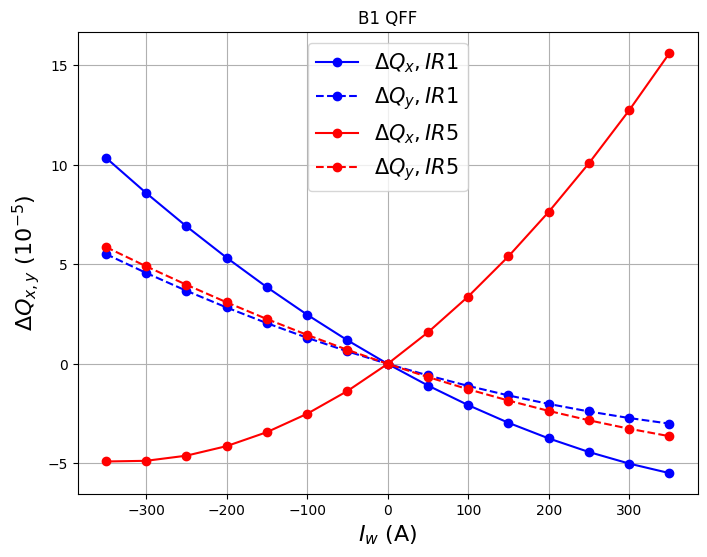

In [31]:

beam = 'b1'
# Wire distance used for both IP and both beam
#===================================================
r_w = {'b1':  {'ip1':0.009195199050594374,
               'ip5':0.012371483207783397},
       'b2':  {'ip1':0.009195200021016113,
               'ip5':0.012371484908716562}}[beam]

# Activating QFF compensation
#===================================================
tracker.vars['enable_qff'] = 1


# Going through both IPs and powering the wires
#===================================================
tuneShifts = {}
for IP in ['ip1','ip5']:
    tracker.vars[f"bbcw_rw_{IP}.{beam}"] = r_w[IP]

    #=============================================================
    #Initialize values
    tracker.vars[f"bbcw_i_ip1.{beam}"] = 0
    tracker.vars[f"bbcw_i_ip5.{beam}"] = 0

    

    # Extracting reference information
    tw = tracker.twiss()
    refQx,refQy =  tw['mux'][-1],tw['muy'][-1]

    
    # RAMPING UP CURRENT
    #=============================================================
    I_vec = np.linspace(-350,350,15)
    Qx = []
    Qy = []

    for I in (I_vec):
        # Setting current value
        tracker.vars[f"bbcw_i_{IP}.{beam}"] = I
        
        # Measuring Tune
        _twiss = tracker.twiss()
        _Qx,_Qy =  _twiss['mux'][-1],_twiss['muy'][-1]

        Qx.append(_Qx)
        Qy.append(_Qy)
        

    # Saving results:
    tuneShifts[(IP,'x')] = np.array(Qx)-refQx
    tuneShifts[(IP,'y')] = np.array(Qy)-refQy

    
# Plotting
#===================================================
plt.figure(figsize=(8,6))
plt.title(f'{beam.upper()} QFF')
for IP,color in zip(['ip1','ip5'],['b','r']):
    plt.plot(I_vec,tuneShifts[(IP,'x')]/1e-5,'-o',color=color,label=rf'$\Delta Q_x, IR{IP[-1]}$')
    plt.plot(I_vec,tuneShifts[(IP,'y')]/1e-5,'--o',color=color,label=rf'$\Delta Q_y, IR{IP[-1]}$')

plt.grid(True)
plt.xlabel(r'$I_w$ (A)',fontsize=16)
plt.ylabel(r'$\Delta Q_{x,y}$ ($10^{-5}$)',fontsize=16)
plt.legend(fontsize=15)



name <class 'tuple'>
s <class 'numpy.ndarray'>
x <class 'numpy.ndarray'>
px <class 'numpy.ndarray'>
y <class 'numpy.ndarray'>
py <class 'numpy.ndarray'>
zeta <class 'numpy.ndarray'>
delta <class 'xobjects.context_cpu.LinkedArrayCpu'>
ptau <class 'xobjects.context_cpu.LinkedArrayCpu'>
betx <class 'numpy.ndarray'>
bety <class 'numpy.ndarray'>
alfx <class 'numpy.ndarray'>
alfy <class 'numpy.ndarray'>
gamx <class 'numpy.ndarray'>
gamy <class 'numpy.ndarray'>
dx <class 'xobjects.context_cpu.LinkedArrayCpu'>
dpx <class 'xobjects.context_cpu.LinkedArrayCpu'>
dy <class 'xobjects.context_cpu.LinkedArrayCpu'>
dpy <class 'xobjects.context_cpu.LinkedArrayCpu'>
mux <class 'numpy.ndarray'>
muy <class 'numpy.ndarray'>
qx <class 'numpy.float64'>
qy <class 'numpy.float64'>
qs <class 'numpy.float64'>
dqx <class 'numpy.float64'>
dqy <class 'numpy.float64'>
slip_factor <class 'numpy.float64'>
momentum_compaction_factor <class 'numpy.float64'>
betz0 <class 'numpy.float64'>
circumference <class 'numpy.float

In [16]:
tw.keys()

dict_keys(['name', 's', 'x', 'px', 'y', 'py', 'zeta', 'delta', 'ptau', 'betx', 'bety', 'alfx', 'alfy', 'gamx', 'gamy', 'dx', 'dpx', 'dy', 'dpy', 'mux', 'muy', 'qx', 'qy', 'qs', 'dqx', 'dqy', 'slip_factor', 'momentum_compaction_factor', 'betz0', 'circumference', 'T_rev', 'R_matrix', 'particle_on_co'])